<p><font size="6"><b>Projet 4 - Openclassrooms. Data Science </b></font></p>


<p><font size="5"><b>Anticipez les besoins en consommation électrique de bâtiments </b></font></p>

<p><font size="4"><b>*Partie 1: Nettoyage et Analyse des données </b></font></p>




Source de données : https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv
        
*© 2021, Ilham Noumir  (mailto:noumir.ilham@gmail.com)

## <div class="alert alert-info"> 0. Importation des bibliothèques et chargement des données : </div> 


#### Importation des bibliothèques :  

In [127]:
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import datetime
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt 
from sklearn import metrics
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_colwidth', -1)
plt.rcParams.update({'font.size':15})

#### Chargement des données : 

In [128]:
data_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
data_2016 =  pd.read_csv('2016-building-energy-benchmarking.csv')

In [129]:
data_2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081


In [130]:
data_2016.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.0,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86


In [131]:
print("La dimension de data_2015", data_2015.shape)
print("La dimension de data_2016", data_2016.shape)

La dimension de data_2015 (3340, 47)
La dimension de data_2016 (3376, 46)


In [132]:
data_2015.dtypes

OSEBuildingID                                                    int64  
DataYear                                                         int64  
BuildingType                                                     object 
PrimaryPropertyType                                              object 
PropertyName                                                     object 
TaxParcelIdentificationNumber                                    object 
Location                                                         object 
CouncilDistrictCode                                              int64  
Neighborhood                                                     object 
YearBuilt                                                        int64  
NumberofBuildings                                                int64  
NumberofFloors                                                   float64
PropertyGFATotal                                                 int64  
PropertyGFAParking                                 

In [133]:
data_2016.City.unique()

array(['Seattle'], dtype=object)


*  Building Type : Classification du type de bâtiment de la ville de Seattle.
* PrimaryPropretyType :L’utilisation principale d’une propriété (p. ex. bureau, magasin de détail). L’utilisation principale est définie comme une fonction qui représente plus de 50 % d’une propriété.
* PropertyGFATotal : Superficie totale du bâtiment et du stationnement.
* PropertyGFAParking : Espace total en pieds carrés de tous les types de stationnement (entièrement clos, partiellement clos et ouvert).
* ENERGYSTARScore : Une EPA a calculé une cote de 1 à 100 qui évalue le rendement énergétique global d’une propriété, en fonction des données nationales, afin de contrôler les différences entre le climat, les utilisations des bâtiments et les opérations. Un score de 50 représente la médiane nationale.
* SiteEnergyUse : La quantité annuelle d’énergie consommée par le bien provenant de toutes les sources d’énergie.
* SiteEnergyUseWN(kBtu): La quantité annuelle d’énergie consommée par la propriété à partir de toutes les sources d’énergie, ajustée à ce que la propriété aurait consommé pendant les conditions météorologiques moyennes de 30 ans.
* Electricity(kWh) : La quantité annuelle d’électricité consommée par la propriété sur place, y compris l’électricité achetée sur le réseau et produite par des systèmes renouvelables sur le site, mesurée en kWh.
*  NaturalGas(therms) :La quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété, mesurée en thermes.
* ComplianceStatus :Si une propriété a satisfait aux exigences d’analyse comparative énergétique pour l’année de déclaration en cours.

## <div class="alert alert-info"> 1.Préparation et nettoyage des données  : </div> 


###  <p style="color:green;"><b>1.1 Préparation des données  : </p><b>

###### Comparaison des deux dataframes  :

In [134]:
colone_data1= pd.DataFrame(data_2015.columns).rename(columns={0:'colone_data2015'})

colone_data2= pd.DataFrame(data_2016.columns).rename(columns={0:'colone_data2016'})
data1_data2 = pd.concat([colone_data1,colone_data2 ] , axis=1)
data1_data2

,colone_data2015,colone_data2016
0,OSEBuildingID,OSEBuildingID
1,DataYear,DataYear
2,BuildingType,BuildingType
3,PrimaryPropertyType,PrimaryPropertyType
4,PropertyName,PropertyName
5,TaxParcelIdentificationNumber,Address
6,Location,City
7,CouncilDistrictCode,State
8,Neighborhood,ZipCode
9,YearBuilt,TaxParcelIdentificationNumber


In [135]:
print('Colonnes présents sur les données de 2015 et non sur les données 2016 :\n\n', data_2015.columns.difference(data_2016.columns))

Colonnes présents sur les données de 2015 et non sur les données 2016 :

 Index(['2010 Census Tracts', 'City Council Districts', 'Comment',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Location', 'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'],
      dtype='object')


In [136]:
print('Colonnes présents sur les données de 2016 et non sur les données 2015 :\n\n', data_2016.columns.difference(data_2015.columns))

Colonnes présents sur les données de 2016 et non sur les données 2015 :

 Index(['Address', 'City', 'Comments', 'GHGEmissionsIntensity', 'Latitude',
       'Longitude', 'State', 'TotalGHGEmissions', 'ZipCode'],
      dtype='object')


###### D'aprés les deux lignes de codes ci-dessus on remarque qu'il y a des colonnes qui se trouvent en 2015 et non sur 2016 et vice_versa: 

In [137]:
data_2015['GHGEmissions(MetricTonsCO2e)'].describe()

count    3330.000000 
mean     110.094102  
std      409.450179  
min      0.000000    
25%      9.265000    
50%      32.740000   
75%      88.642500   
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [138]:
data_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()

count    3330.000000
mean     0.985339   
std      1.637172   
min      0.000000   
25%      0.080000   
50%      0.460000   
75%      1.180000   
max      31.380000  
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [139]:
data_2016['TotalGHGEmissions'].describe()

count    3367.000000 
mean     119.723971  
std      538.832227  
min     -0.800000    
25%      9.495000    
50%      33.920000   
75%      93.940000   
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [140]:
data_2016['GHGEmissionsIntensity'].describe()

count    3367.000000
mean     1.175916   
std      1.821452   
min     -0.020000   
25%      0.210000   
50%      0.610000   
75%      1.370000   
max      34.090000  
Name: GHGEmissionsIntensity, dtype: float64

* les colones GHGEmissions(MetricTonsCO2e) et TotalGHGEmissions sont référence à la même chose c'est à dire  La quantité totale d’émissions de gaz à effet de serre rejetés dans l’atmosphère.
* Les colones GHGEmissionsIntensity(kgCO2e/ft2) et GHGEmissionsIntensity font égalemnt référence à la même chose c'est à dire l'inensité ou l'émissions totales de gaz à effet de serre divisées par la surface. 

* On va renomer ces colones dans les données de 2015 pour assurer l'homogénité des deux dataframes pour le reste des colones je vais les éliminer car ils vont pas apporter grande chose à mes analyses . 

In [141]:
data_2015= data_2015.rename(columns={'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity' , 'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions'})

In [142]:
data_2015.drop(columns=['2010 Census Tracts', 'City Council Districts', 'Comment', 'Location',
       'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'] , inplace=True)

In [143]:
data_2016.drop(columns=['Address', 'City', 'Comments', 'Latitude', 'Longitude', 'State',
       'ZipCode'] , inplace=True)

In [144]:
print("La dimension de data_2015", data_2015.shape)
print("La dimension de data_2016", data_2016.shape)

La dimension de data_2015 (3340, 39)
La dimension de data_2016 (3376, 39)


####  Quelques modifications sur les dataframes avant assemblage : 

In [145]:
print(data_2015.DefaultData.unique())
print(data_2016.DefaultData.unique())


['No' 'Yes' nan]
[False  True]


In [146]:
data_2015['DefaultData']= data_2015['DefaultData'].map({'Yes':True, 'No': False})

#### Concaténation des deux Dataframes : 

In [147]:
data= pd.concat([data_2015, data_2016])
data.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,False,Compliant,NaN
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,False,Compliant,NaN
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,True,Compliant,NaN


In [148]:
data.shape

(6716, 39)

###  <p style="color:green;"><b>1.2 Nettoyage des données: </p><b>

In [149]:
print("Le nombre total des valeurs manquantes", round(((data.isnull().sum().sum())*100/(data.shape[0]*data.shape[1])),2))

Le nombre total des valeurs manquantes 12.79


#### % des valeurs manquantes par colonne : 

In [150]:
data_missing= pd.DataFrame(((data.isnull().sum()/ len(data))*100).sort_values(ascending= False)).reset_index()
data_missing= data_missing.rename(columns={'index': 'Colonne', 0: '%NaN'})
data_missing

,Colonne,%NaN
0,Outlier,98.272781
1,YearsENERGYSTARCertified,96.590232
2,ThirdLargestPropertyUseTypeGFA,82.787373
3,ThirdLargestPropertyUseType,82.787373
4,SecondLargestPropertyUseTypeGFA,51.786778
5,SecondLargestPropertyUseType,51.786778
6,ENERGYSTARScore,24.166170
7,LargestPropertyUseTypeGFA,2.322811
8,LargestPropertyUseType,2.322811
9,ListOfAllPropertyUseTypes,2.025015


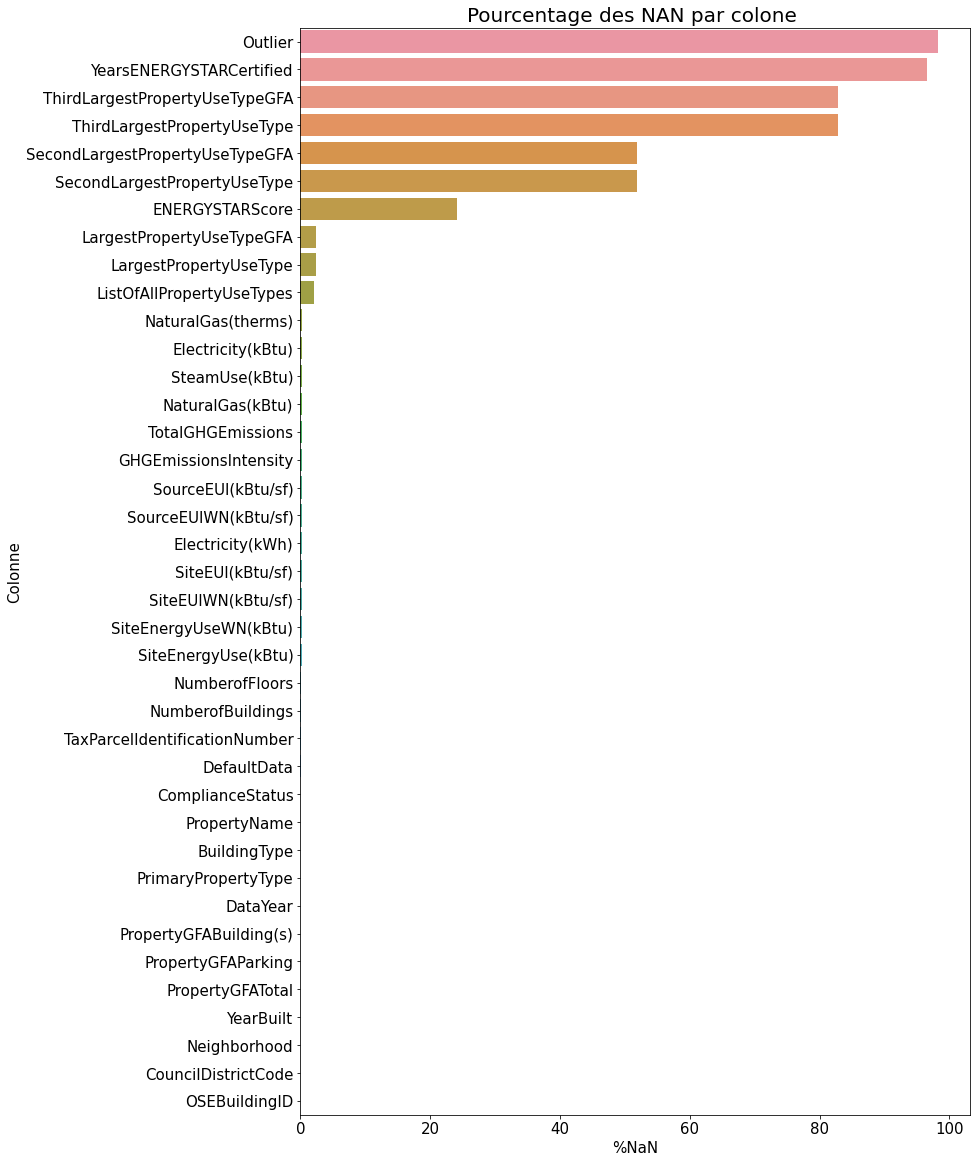

In [151]:
data_missing= pd.DataFrame(((data.isnull().sum()/ len(data))*100).sort_values(ascending= False)).reset_index()
data_missing= data_missing.rename(columns={'index': 'Colonne', 0: '%NaN'})
plt.figure(figsize=(12,20))
sns.barplot(x='%NaN' , y='Colonne'  , data= data_missing)
plt.title('Pourcentage des NAN par colone ', fontsize= 20)
plt.show()

###### La colonne Outlier contient beaucoup de valeurs manquantes (plus de 98% ).Donc je vais commencer par supprimer les lignes contenant les outliers(High Outlier et Low Outlier) ensuite je vais supprimer la colonne entièrement. 

In [152]:
data.Outlier.unique()

array([nan, 'High Outlier', 'Low Outlier', 'High outlier', 'Low outlier'],
      dtype=object)

In [153]:
data.shape

(6716, 39)

In [154]:
data= data[data['Outlier'].isnull()]

In [155]:
data.shape

(6600, 39)

In [156]:
data.drop(columns=['Outlier','YearsENERGYSTARCertified'], axis=1, inplace=True)

In [157]:
data.shape[1]

37

####  % Valeurs manquantes par ligne : 

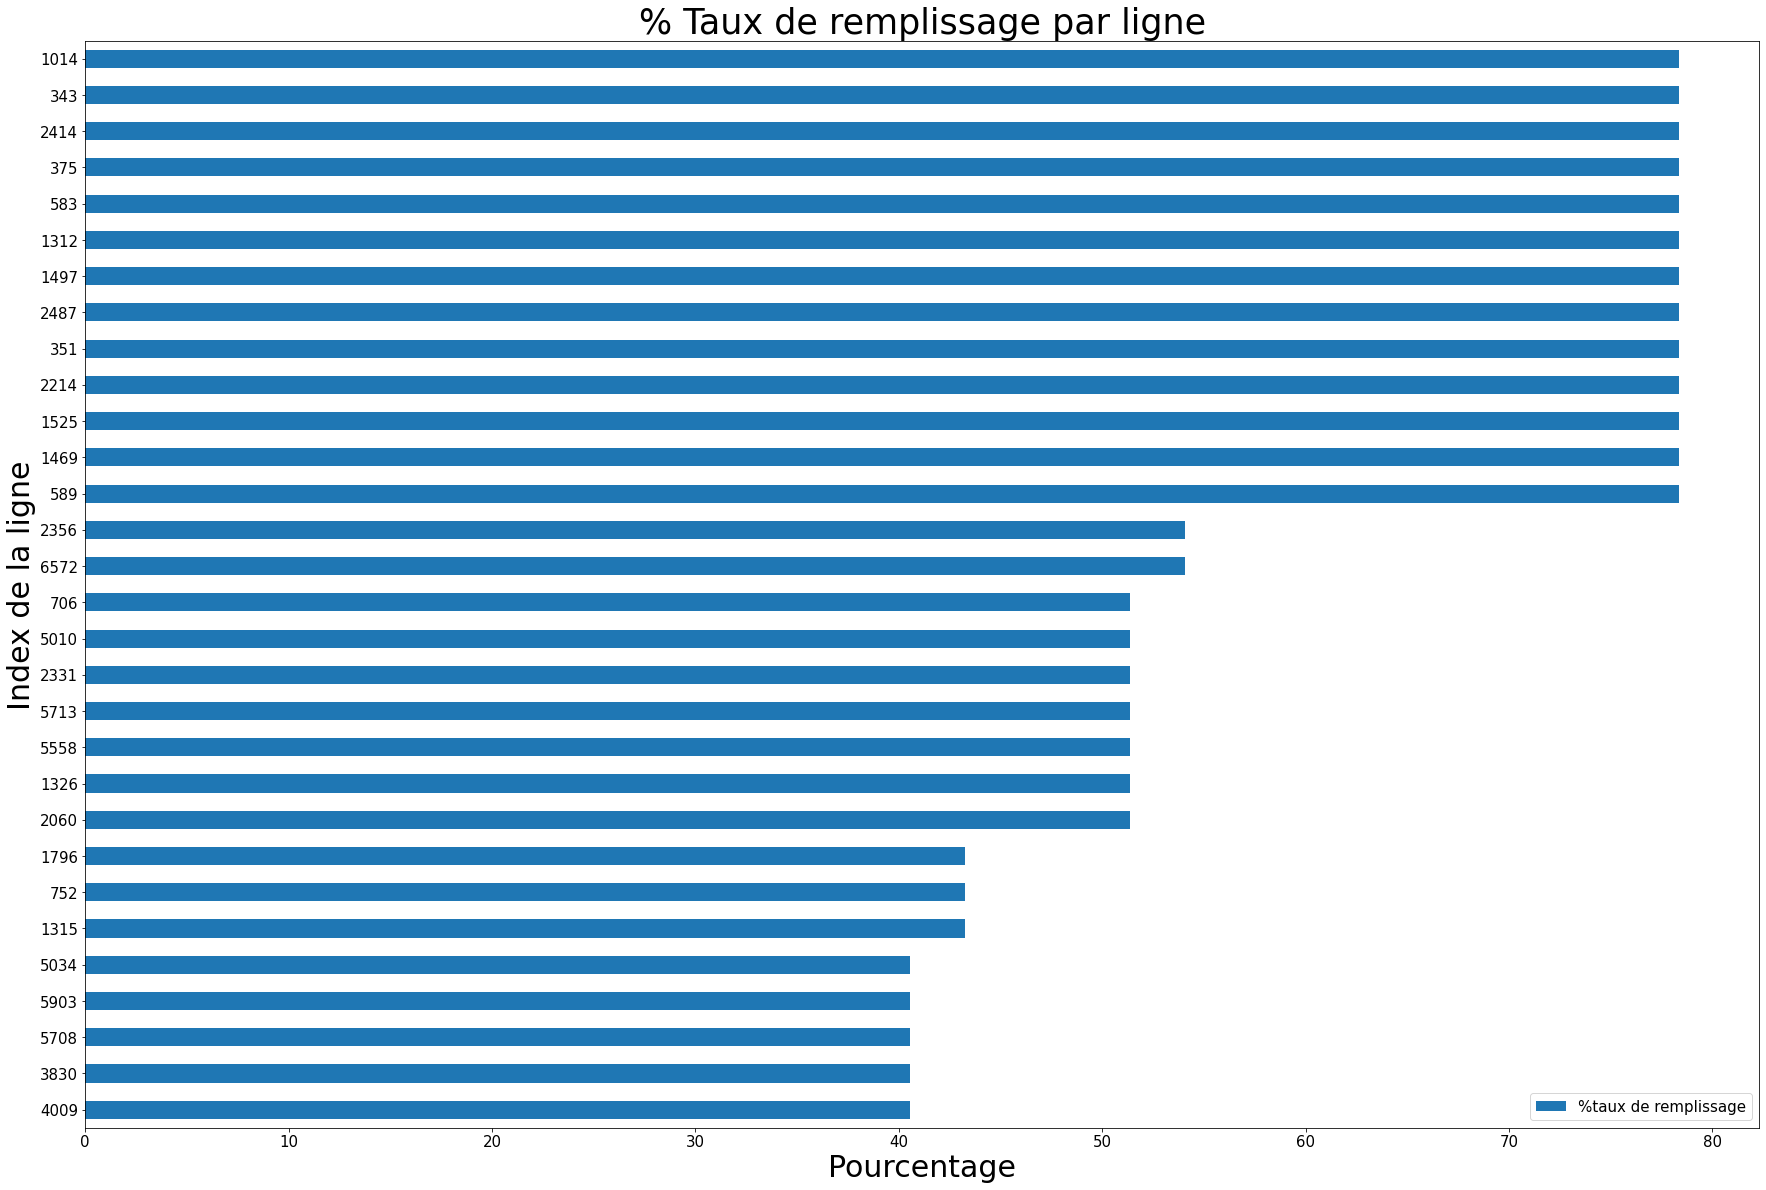

In [158]:
f, ax= plt.subplots(figsize=(30,20))
nan_par_ligne= []
for index, row in data.iterrows(): 
    nan_par_ligne.append((1-(row.isna().sum().sum()/data.shape[1]))*100)
data_missing_par_line= pd.DataFrame(nan_par_ligne, columns=['%taux de remplissage'])
data_missing_par_line= data_missing_par_line.sort_values(by ='%taux de remplissage',ascending=True).head(30)
data_missing_par_line.plot(kind='barh' , ax=ax)
plt.title('% Taux de remplissage par ligne' , fontsize= 35)
plt.xlabel('Pourcentage' , fontsize= 30)
plt.ylabel('Index de la ligne' , fontsize= 30)

plt.show()

###### Je vais procéder à la suppression de toutes les lignes ayant un taux de remplissage inférieur à 80% .

In [159]:
data = data[data.count(axis='columns')/data.shape[1]>0.8].reset_index(drop=True)

####  Valeurs négatifs : 

In [160]:
data.shape

(6560, 37)

In [161]:
data_numeric = data.select_dtypes(['int64','float64'])
numerical_columns = data.select_dtypes(['int64','float64']).columns

In [162]:
data_numeric.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6552.000000,6.560000e+03,6560.000000,6.560000e+03,6.441000e+03,3178.000000,1132.000000,5001.000000,6558.000000,6559.000000,6560.000000,6560.000000,6.560000e+03,6.559000e+03,6.560000e+03,6.560000e+03,6.560000e+03,6.560000e+03,6.560000e+03,6560.000000,6560.000000
mean,20830.738110,2015.508384,4.443598,1968.408841,1.072256,4.710928,9.340017e+04,9591.081098,8.380909e+04,7.744464e+04,28151.324826,11269.965017,67.993001,53.749695,56.862464,132.601113,137.452835,5.184006e+06,5.224865e+06,2.583036e+05,1.051218e+06,3.586827e+06,1.307094e+04,1.307094e+06,114.362354,1.067389
std,11876.236545,0.499968,2.119581,32.889595,1.610576,5.516997,1.893317e+05,34094.228659,1.751053e+05,1.694550e+05,53726.474388,26469.050048,26.621520,54.204664,55.492529,133.025118,132.650925,1.827425e+07,1.509713e+07,3.720124e+06,3.683472e+06,1.256815e+07,5.732526e+04,5.732526e+06,481.867290,1.682594
min,1.000000,2015.000000,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,-3.000000,-5.055000e+04,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000
25%,19932.000000,2015.000000,3.000000,1948.000000,1.000000,2.000000,2.849200e+04,0.000000,2.728800e+04,2.509400e+04,4993.000000,2351.000000,52.000000,27.799999,29.700001,74.500000,79.700000,9.293672e+05,9.899020e+05,0.000000e+00,1.886650e+05,6.437438e+05,0.000000e+00,0.000000e+00,9.537500,0.160000
50%,23049.500000,2016.000000,4.000000,1974.000000,1.000000,4.000000,4.419500e+04,0.000000,4.229200e+04,3.960000e+04,10664.000000,5043.000000,75.000000,38.000000,40.900000,95.699997,102.099999,1.789915e+06,1.924436e+06,0.000000e+00,3.431640e+05,1.170924e+06,3.074290e+03,3.074265e+05,33.175000,0.540000
75%,25854.500000,2016.000000,7.000000,1997.000000,1.000000,5.000000,9.000000e+04,0.000000,8.163900e+04,7.484000e+04,26466.000000,10270.000000,90.000000,59.600000,64.450001,143.125004,148.825001,4.108732e+06,4.345796e+06,0.000000e+00,8.199128e+05,2.797653e+06,1.136424e+04,1.136427e+06,90.135000,1.270000
max,50226.000000,2016.000000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


La describtion des variables numériques ci_dessus nous montre l'existance des valeurs négatifs pour des variables comme 
la surface du Parking et la surface du meuble ... donc je vais procéder au filtrage de ces valeurs. 

In [163]:
for col in numerical_columns: 
    negative_value= data[data[col]<0]
    data.drop(negative_value.index, inplace=True)

In [164]:
data.shape

(6555, 37)

###  <p style="color:green;"><b>1.3 Filtrage des catégories des bâtiments : </p><b>

In [165]:
data_no_numeric= data.select_dtypes(exclude=['int64', 'float64'])
for col in data_no_numeric.columns: 
    print('-'*80)
    print('Le nombre de valeurs que peuvent prendre la colone :', col)
    print(data[col].nunique())
    print('Les valeurs que peuvent prendre la colone :', col)
    print('\n')
    print(data_no_numeric[col].unique())

--------------------------------------------------------------------------------
Le nombre de valeurs que peuvent prendre la colone : BuildingType
8
Les valeurs que peuvent prendre la colone : BuildingType


['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Multifamily LR (1-4)' 'Campus'
 'Multifamily HR (10+)' 'Nonresidential WA']
--------------------------------------------------------------------------------
Le nombre de valeurs que peuvent prendre la colone : PrimaryPropertyType
32
Les valeurs que peuvent prendre la colone : PrimaryPropertyType


['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'College/University' 'Small- and Mid-Sized Office'
 'Self-Storage Facility\n' 'Distribution Center' 'Large Office'
 'Retail Store' 'Low-Rise Multifamily' 'Senior Care Community'
 'Medical Office' 'Hospital' 'Residence Hall/Dormitory'
 'Non-Refrigerated Warehouse' 'Distribution Center\n' 'SPS-District K-12'
 'Worship Facility' 'Supe

Le but est d'analyser la consommation d'énergie pour des batiments non résidentiels.Donc Je vais procéder à la suppression 
des catégories contenant le mot "Mutifamily"

In [166]:
data= data[~(data['BuildingType'].str.contains('Multifamily'))]
data= data[~(data['PrimaryPropertyType'].str.contains('Multifamily'))]

In [167]:
data.shape

(3241, 37)

In [168]:
usetype_dict = {'Retail Store' : 'Retail',
                'Supermarket/Grocery Store' : 'Retail',
                'Repair Services (Vehicle, Shoe, Locksmith, etc)' : 'Retail',
                'Automobile Dealership': 'Retail',
                'Convenience Store without Gas Station': 'Retail',
                'Personal Services': 'Retail',
                'Enclosed Mall': 'Retail',
                'Strip Mall': 'Retail',
                'Wholesale Club/Supercenter': 'Retail',
                'Other - Mall': 'Retail',
                'Supermarket / Grocery Stor': 'Retail',
                
                'Food Sales': 'Leisure',
                'Restaurant' : 'Leisure',
                'Other - Restaurant/Bar' : 'Leisure',
                'Food Service': 'Leisure' ,
                'Worship Facility': 'Leisure',
                'Other - Recreation': 'Leisure',
                'Other - Entertainment/Public Assembly': 'Leisure',
                'Performing Arts': 'Leisure',
                'Bar/Nightclub': 'Leisure',
                'Movie Theater': 'Leisure',
                'Museum': 'Leisure',
                'Social/Meeting Hall': 'Leisure',
                'Fitness Center/Health Club/Gym': 'Leisure',
                'Lifestyle Center ': 'Leisure',
                'Fast Food Restaurant': 'Leisure',
                
                'Multifamily Housing' : 'Hotel/Senior Care/Housing',
                'Other - Lodging/Residential': 'Hotel/Senior Care/Housing',
                'Residence Hall/Dormitory': 'Hotel/Senior Care/Housing',
                'Hotel' : 'Hotel/Senior Care/Housing',
                'Senior Care Community' : 'Hotel/Senior Care/Housing',
                'Residential Care Facility' : 'Hotel/Senior Care/Housing',
                'High-Rise Multifamily': 'Hotel/Senior Care/Housing',
                
                'Medical Office' : 'Health',
                
                'Other - Services' : 'Office',
                'Bank Branch' : 'Office',
                'Financial Office' : 'Office',
                'Other - Public Services': 'Office',

                'K-12 School' : 'Education',
                'Other - Education': 'Education',
                'Vocational School' : 'Education', 
                'Adult Education' : 'Education',
                'Pre-school/Daycare': 'Education',
                'University': 'Education',
                'College/University': 'Education',
                'Library': 'Education'
               }

colonneUseProprety = ['LargestPropertyUseType' , 'PrimaryPropertyType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']
for column in colonneUseProprety:
    data[column] = data[column].replace(usetype_dict)


In [169]:
data['PrimaryPropertyType']= data['PrimaryPropertyType'].replace('Distribution Center\n','Distribution Center')
data['PrimaryPropertyType']= data['PrimaryPropertyType'].replace('Self-Storage Facility\n','Self-Storage Facility')
data['PrimaryPropertyType']= data['PrimaryPropertyType'].replace('Supermarket / Grocery Store','Retail')
data['PrimaryPropertyType']= data['PrimaryPropertyType'].replace('Restaurant\n','Leisure')

In [170]:
data.PrimaryPropertyType.nunique()

19

In [171]:
data.shape

(3241, 37)

###### Traitement des colonnes : Neighberhood , Compliance Status :

In [172]:
data.Neighborhood.unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE', 'Central',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [173]:
data['Neighborhood']= data['Neighborhood'].replace('Central', 'CENTRAL')
data['Neighborhood']= data['Neighborhood'].replace('Ballard', 'BALLARD')
data['Neighborhood']= data['Neighborhood'].replace('North', 'NORTH')
data['Neighborhood']= data['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE')
data['Neighborhood']= data['Neighborhood'].replace('Delridge', 'DELRIDGE')
data['Neighborhood']= data['Neighborhood'].replace('Northwest', 'NORTHWEST')

In [174]:
data.Neighborhood.unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

In [175]:
print(data.ComplianceStatus.unique())
print(data.DefaultData.unique())

['Compliant' 'Error - Correct Default Data' 'Missing Data' 'Non-Compliant']
[False True]


In [176]:
data= data[~(data['ComplianceStatus']=='Missing Data')]


In [177]:
print(data.ComplianceStatus.unique())
print(data.DefaultData.unique())

['Compliant' 'Error - Correct Default Data' 'Non-Compliant']
[False True]


In [178]:
data[data['ComplianceStatus']=='Non-Compliant']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus
3528,435,2016,NonResidential,Other,Washington State Convention Center,1978200105,7,DOWNTOWN,1990,1.0,6.0,1400000,0,1400000,"Convention Center, Parking",Convention Center,1072000.0,Parking,686750.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,Non-Compliant


In [179]:
data_missing= pd.DataFrame(((data.isnull().sum()/ len(data))*100).sort_values(ascending= False)).reset_index()
data_missing= data_missing.rename(columns={'index': 'Colonne', 0: '%NaN'})
data_missing

,Colonne,%NaN
0,ThirdLargestPropertyUseTypeGFA,79.051751
1,ThirdLargestPropertyUseType,79.051751
2,SecondLargestPropertyUseTypeGFA,49.240781
3,SecondLargestPropertyUseType,49.240781
4,ENERGYSTARScore,32.723892
5,LargestPropertyUseTypeGFA,1.704369
6,LargestPropertyUseType,1.704369
7,ListOfAllPropertyUseTypes,1.456461
8,NumberofFloors,0.247908
9,SiteEUI(kBtu/sf),0.030989


In [180]:
data.dropna(subset = ['SiteEnergyUseWN(kBtu)', 'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'NumberofFloors',
                     'LargestPropertyUseTypeGFA','LargestPropertyUseType','ListOfAllPropertyUseTypes',
                   'NumberofFloors','SiteEUI(kBtu/sf)','SiteEnergyUseWN(kBtu)','TaxParcelIdentificationNumber',
                   'SiteEUIWN(kBtu/sf)'], inplace=True)
print(data.shape)

(3162, 37)


In [181]:
data_missing= pd.DataFrame(((data.isnull().sum()/ len(data))*100).sort_values(ascending= False)).reset_index()
data_missing= data_missing.rename(columns={'index': 'Colonne', 0: '%NaN'})
data_missing

,Colonne,%NaN
0,ThirdLargestPropertyUseTypeGFA,78.621126
1,ThirdLargestPropertyUseType,78.621126
2,SecondLargestPropertyUseType,48.323846
3,SecondLargestPropertyUseTypeGFA,48.323846
4,ENERGYSTARScore,33.111954
5,TotalGHGEmissions,0.000000
6,NaturalGas(kBtu),0.000000
7,NaturalGas(therms),0.000000
8,Electricity(kBtu),0.000000
9,Electricity(kWh),0.000000


Suppression des colonnes contennant des données énergétiques Sauf les variables cibles  : 

In [182]:
data.drop(columns=['SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)',  'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)'], inplace=True)

In [183]:
data.shape

(3162, 27)

Création de la variable "BuildingAge" qui sera la différence entre "DataYear" et "YearBuilt".

In [184]:
data['BuildingAge'] = data['DataYear'] - data['YearBuilt']
print(data[['BuildingAge','DataYear','YearBuilt']])

      BuildingAge  DataYear  YearBuilt
0     88           2015      1927     
1     19           2015      1996     
2     46           2015      1969     
3     35           2015      1980     
4     16           2015      1999     
...   ..            ...       ...     
6555  26           2016      1990     
6556  12           2016      2004     
6557  42           2016      1974     
6558  27           2016      1989     
6559  78           2016      1938     

[3162 rows x 3 columns]


In [185]:
data.drop(['YearBuilt'], axis=1, inplace=True)
data.drop(['DataYear'], axis=1, inplace=True)

Egalement je vais supprimer les colonnes suivantes : car ils contiennent beaucoup de valeurs manquantes et je vais pas les inclure dans mon analyse et mes modèles d'apprentissage 

In [186]:
data.drop(columns=['SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA' ,'OSEBuildingID'] , inplace=True)

In [187]:
print(data.shape)

(3162, 21)


Je vais créer deux Dataframes : Une contanant l variable EnergyStarScore et l'autre non 

In [188]:
dataEnergyScore= data.copy()

In [189]:
data.drop(columns='ENERGYSTARScore' , inplace=True)

In [190]:
data.shape

(3162, 20)

In [191]:
data.duplicated().sum()

0

In [192]:
data.to_csv('data_01-10-21.csv', index=False)

## <div class="alert alert-info"> 2.Analyse et exploration des données  : </div> 

###  <p style="color:green;"><b>2.1  Analyse univariée : </p><b>

In [195]:
data_numeric= data.select_dtypes(['int64', 'float64'])
data_no_numeric= data.select_dtypes(exclude=['int64', 'float64'])

In [196]:
print(data_numeric.columns)
print('\n')
print(data_no_numeric.columns)

Index(['CouncilDistrictCode', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'BuildingAge'],
      dtype='object')


Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'DefaultData',
       'ComplianceStatus'],
      dtype='object')


#####  Boxplot : 

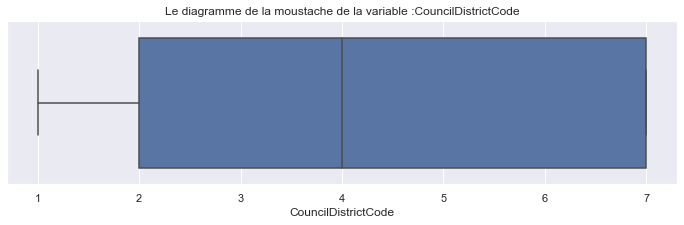

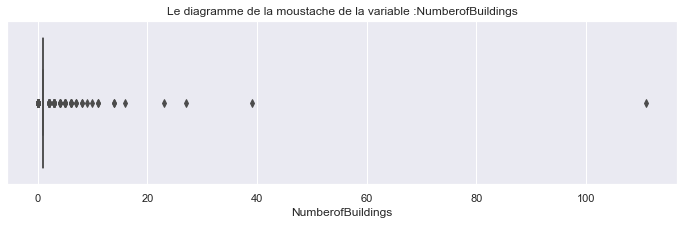

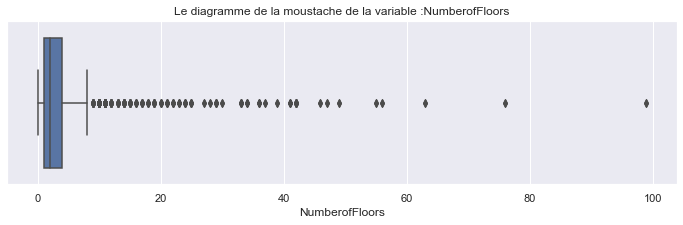

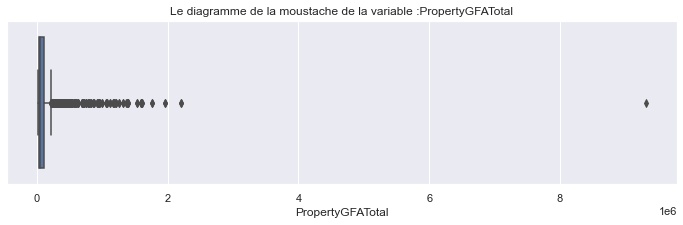

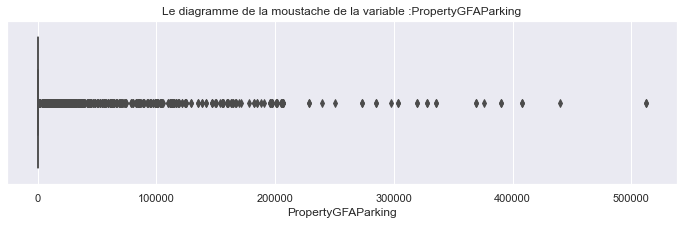

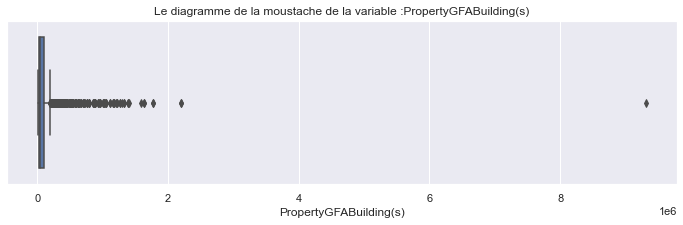

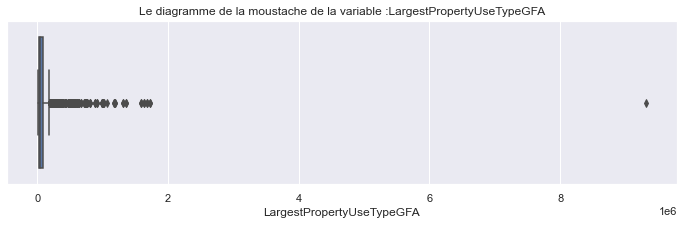

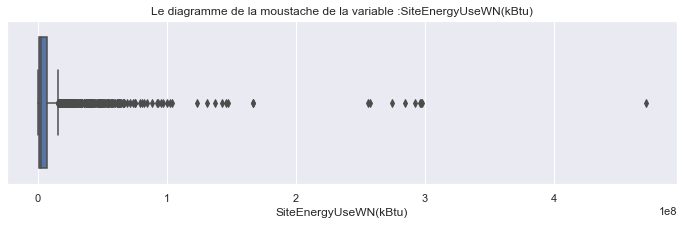

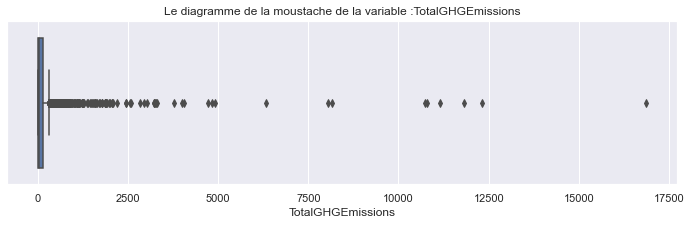

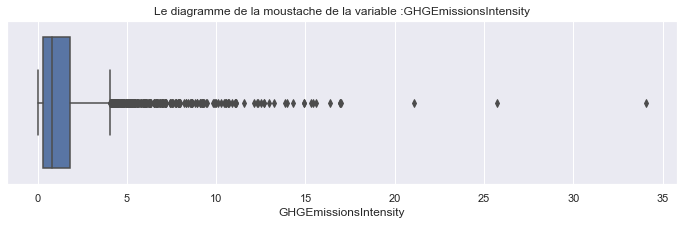

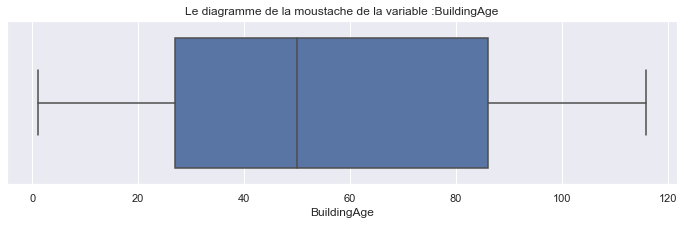

In [200]:
for col in data_numeric.columns: 
    plt.figure(figsize= (12,3))
    sns.set(font_scale=1)
    sns.boxplot(data_numeric[col])
    title= 'Le diagramme de la moustache de la variable :' + col
    plt.title(title)
    plt.show()
    

#####  Histogrammes : 

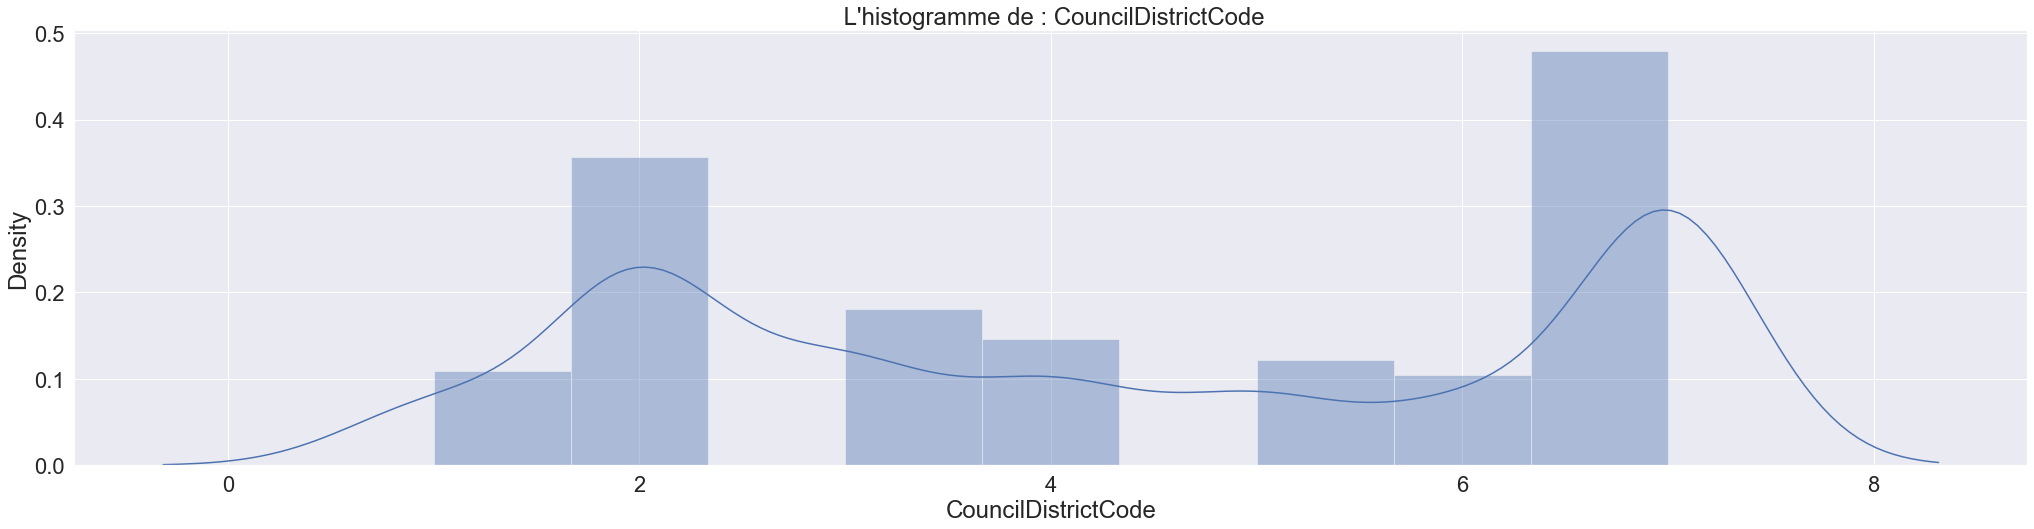

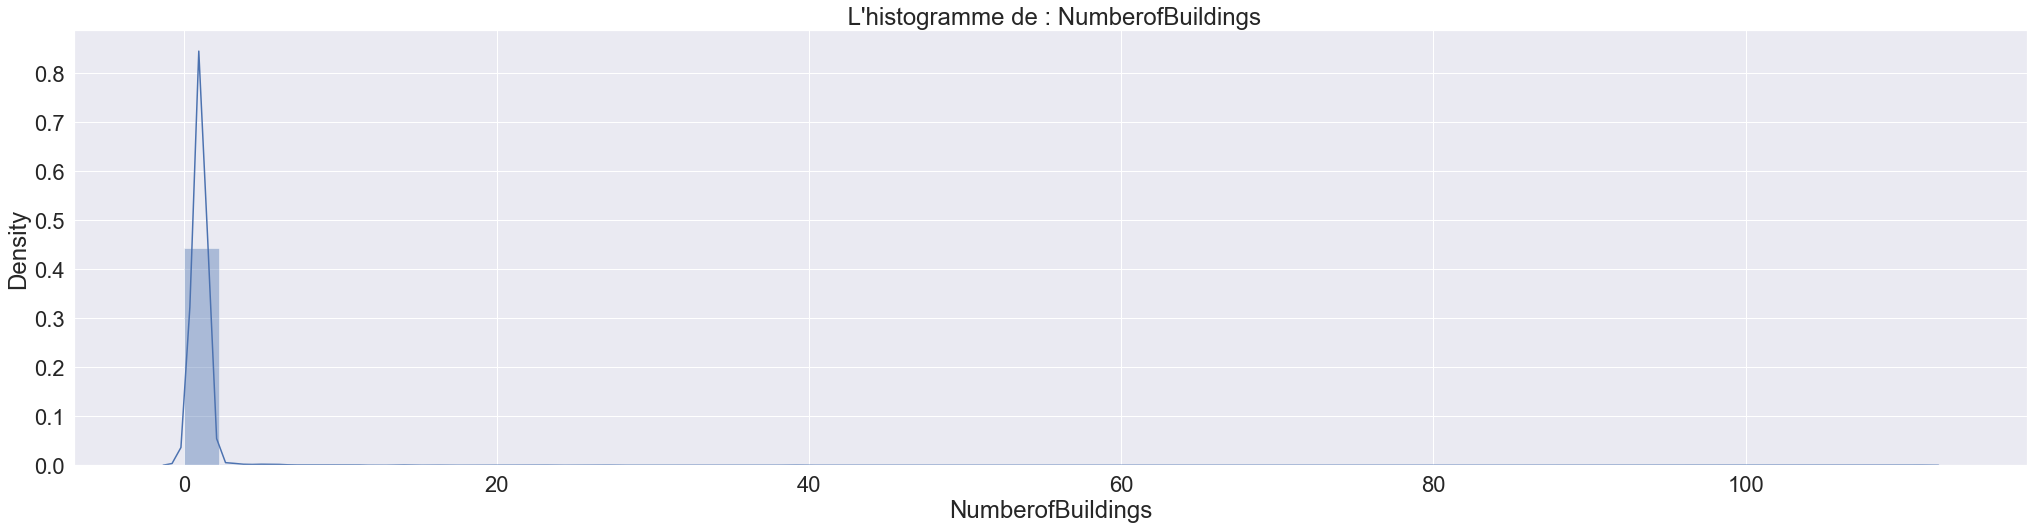

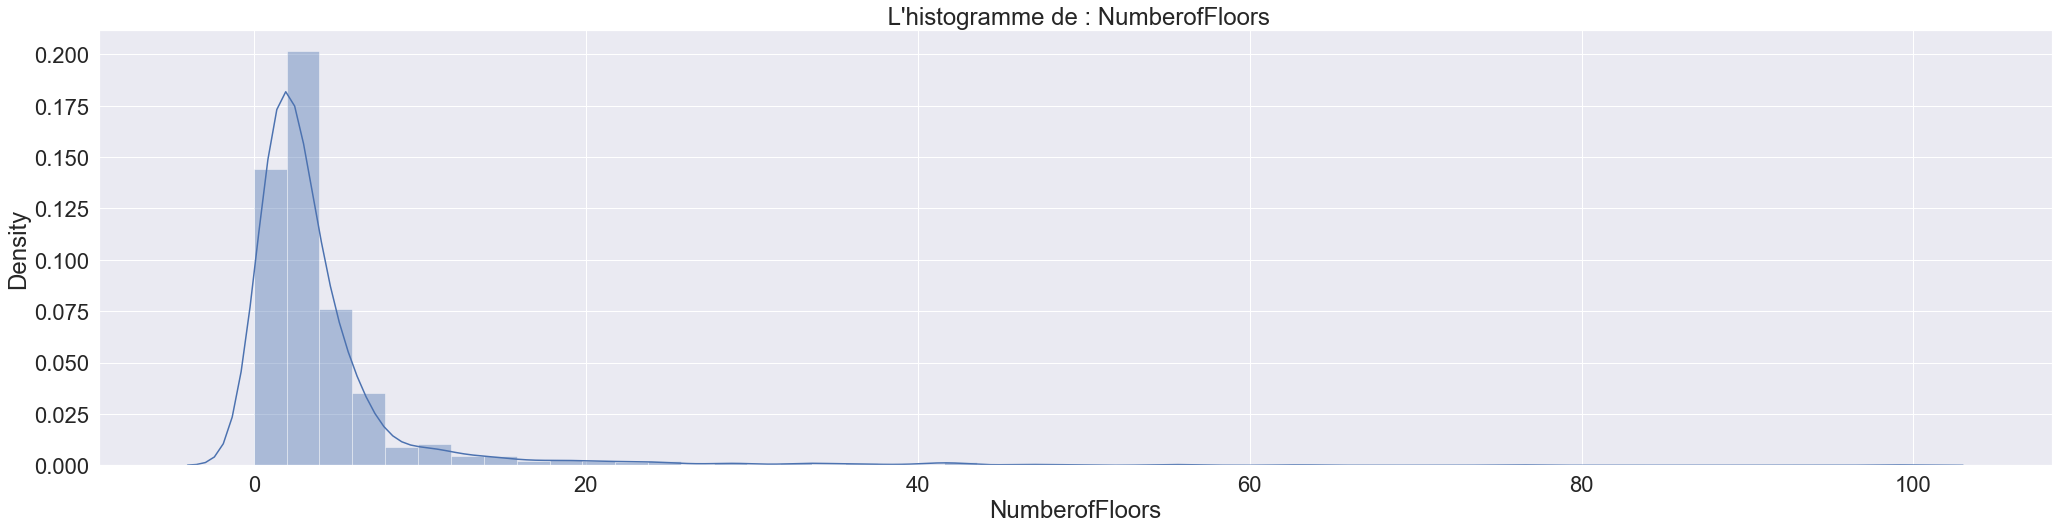

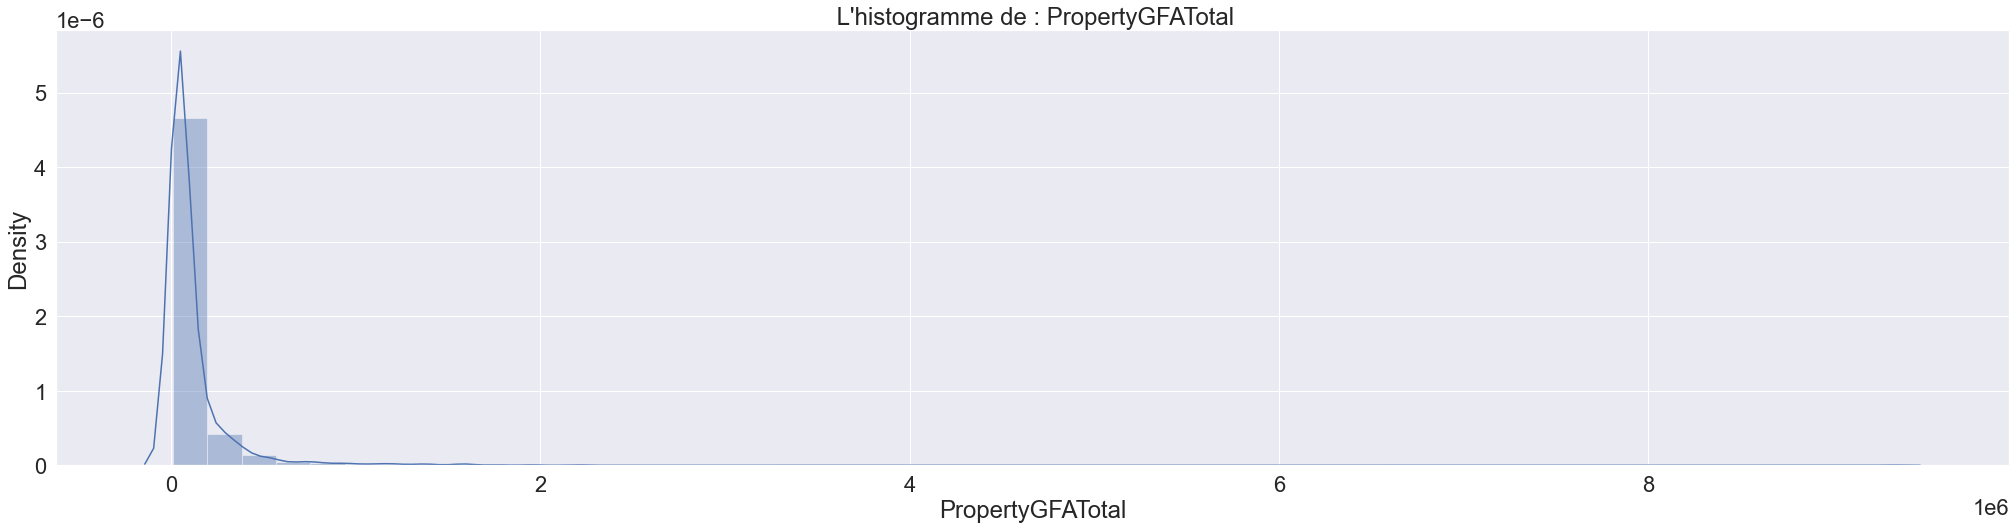

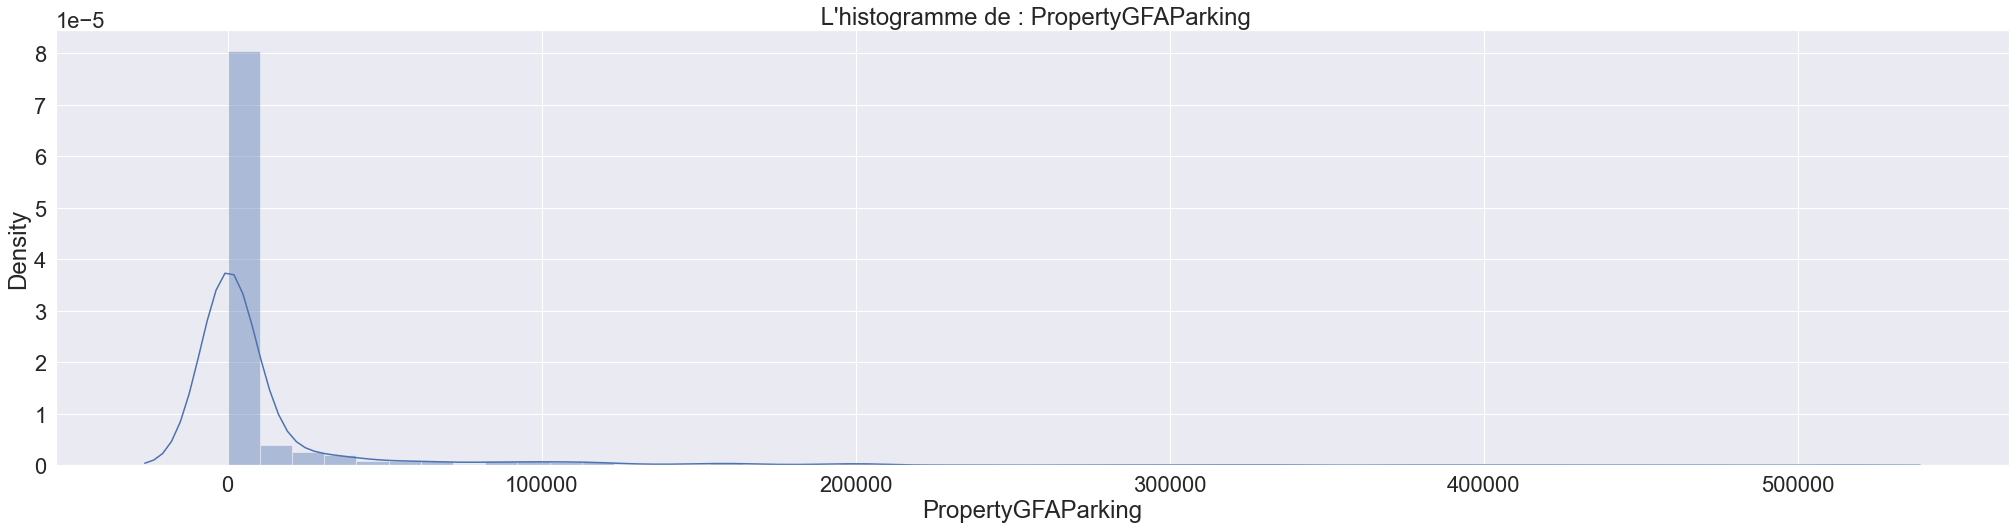

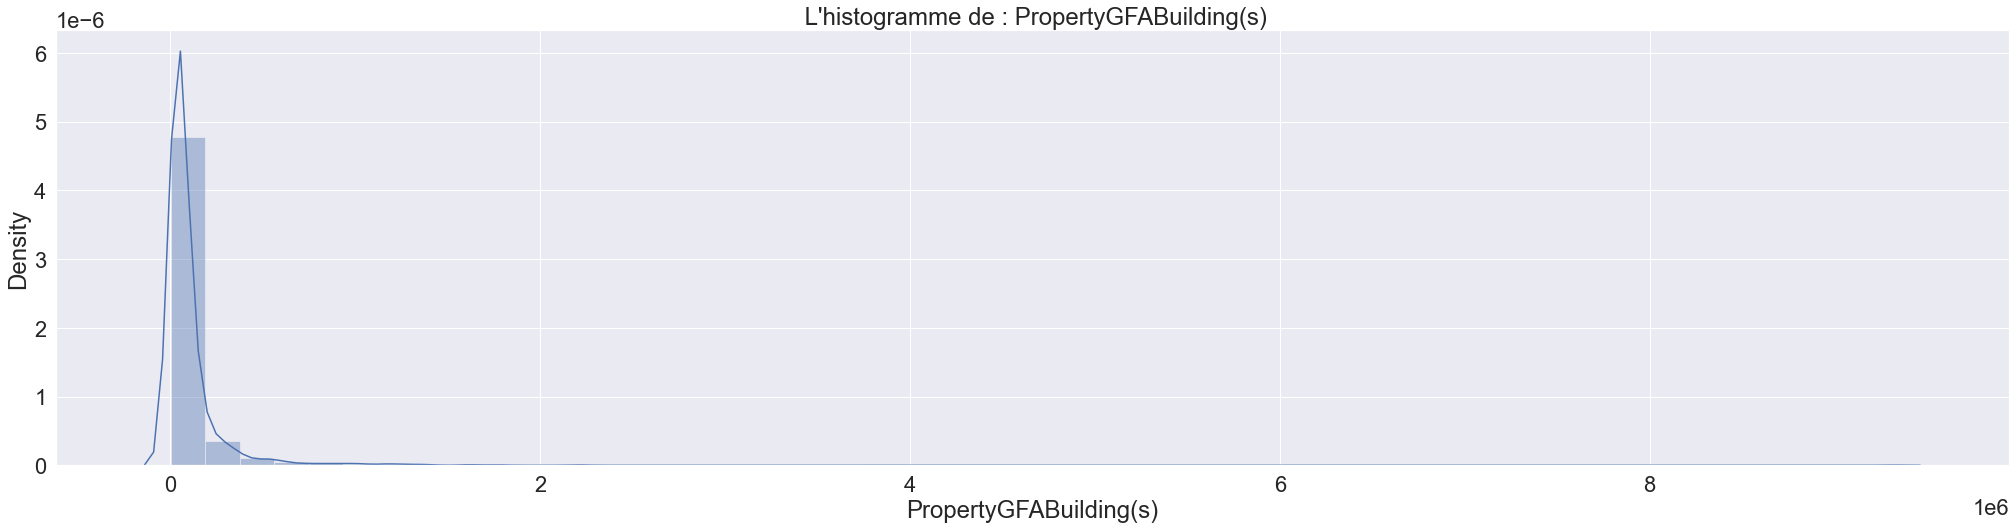

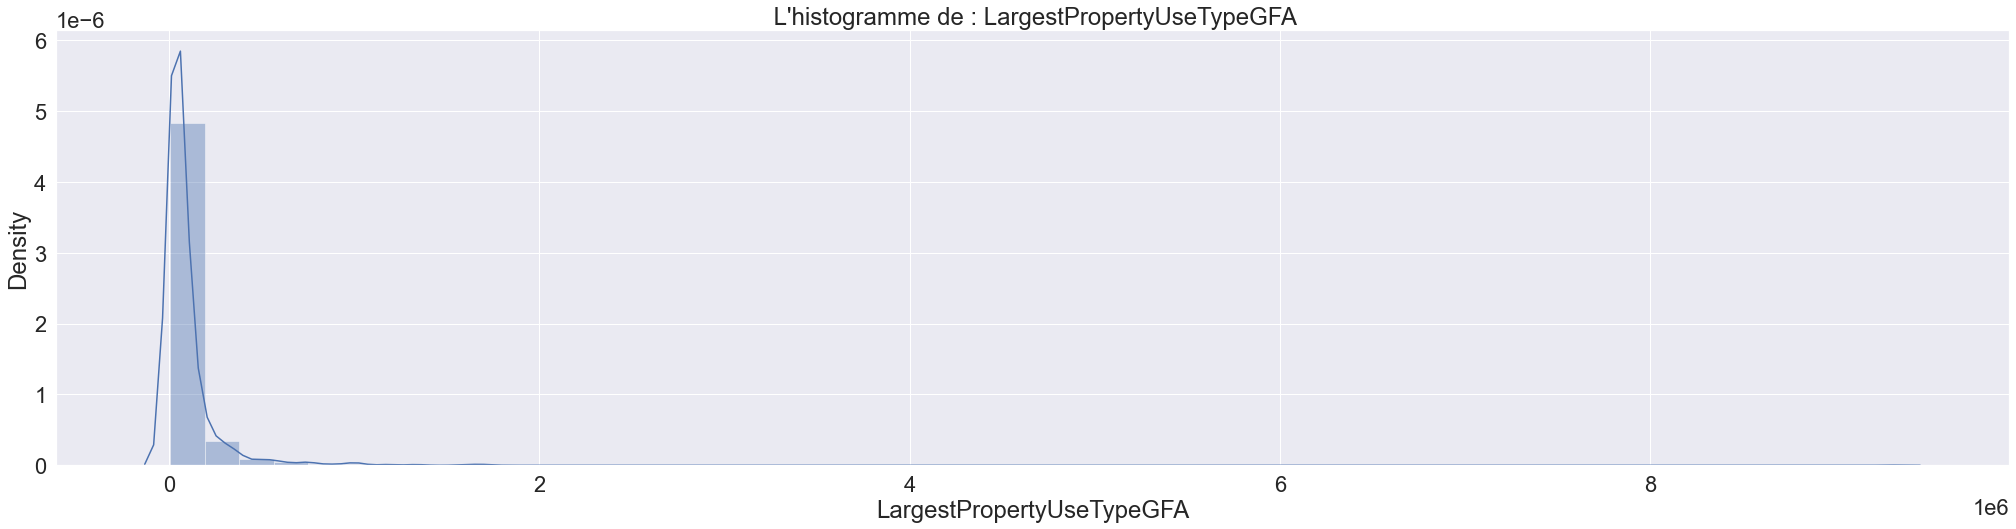

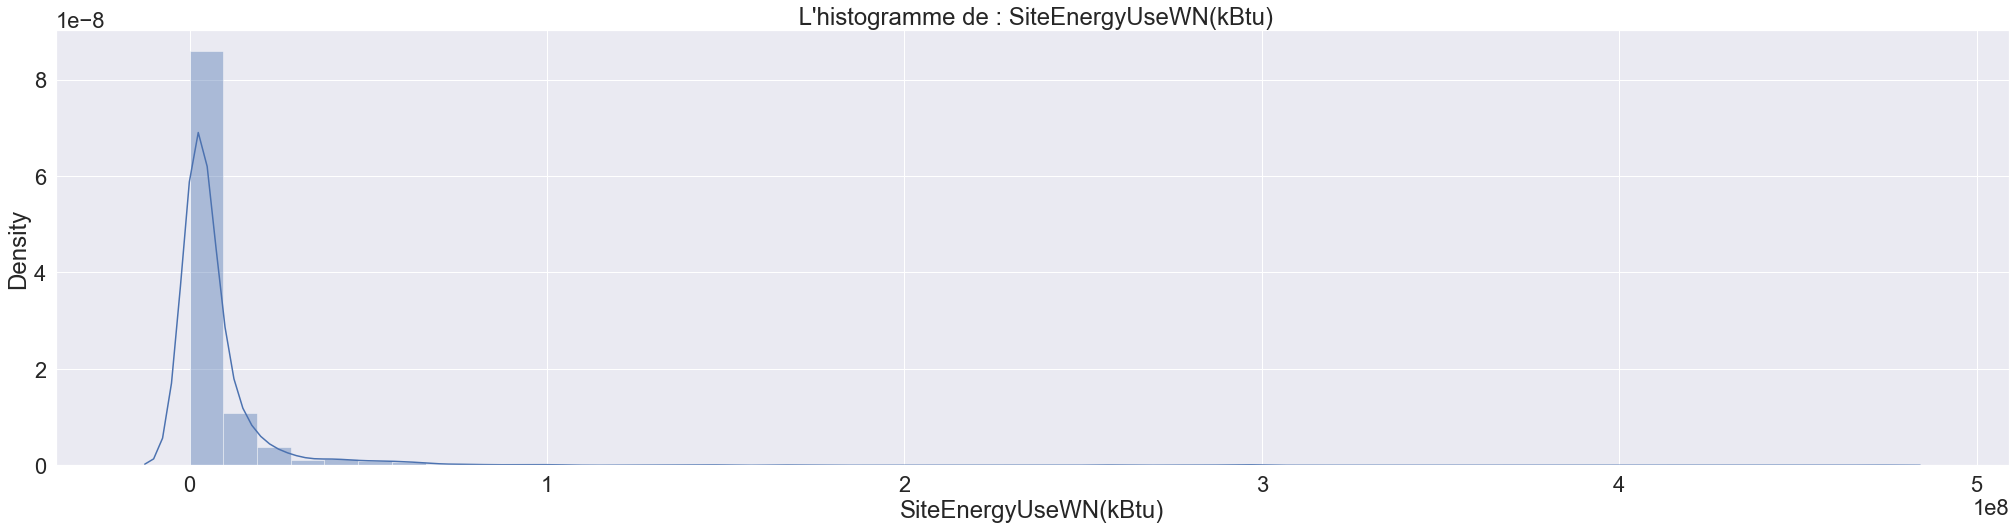

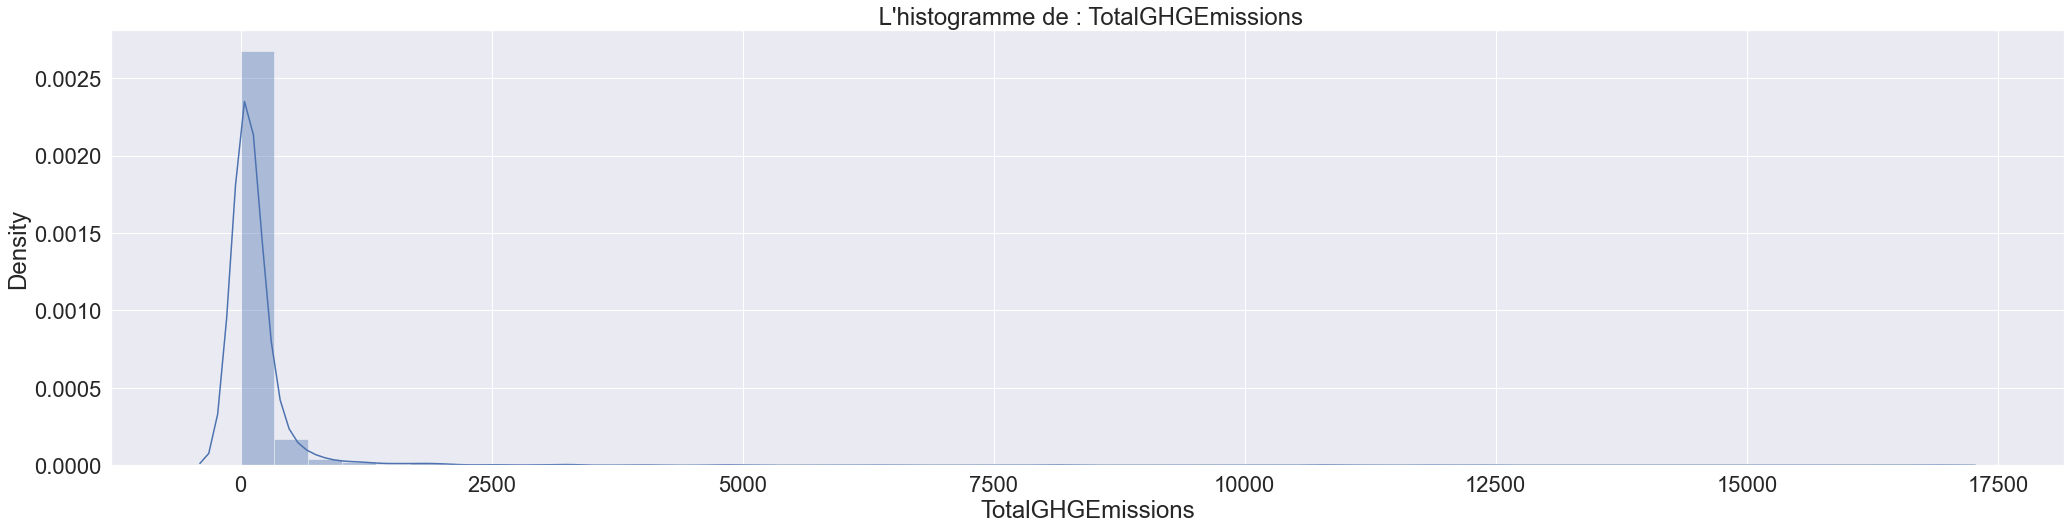

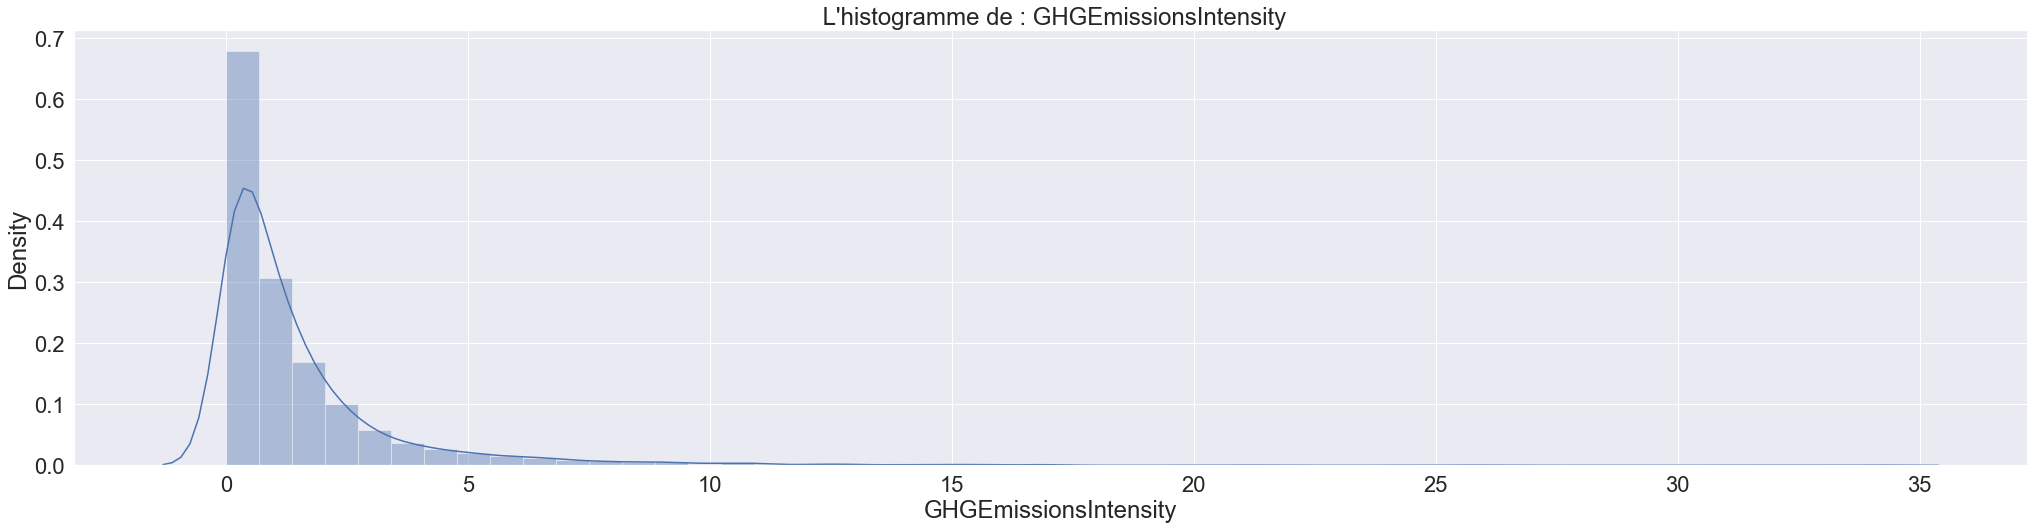

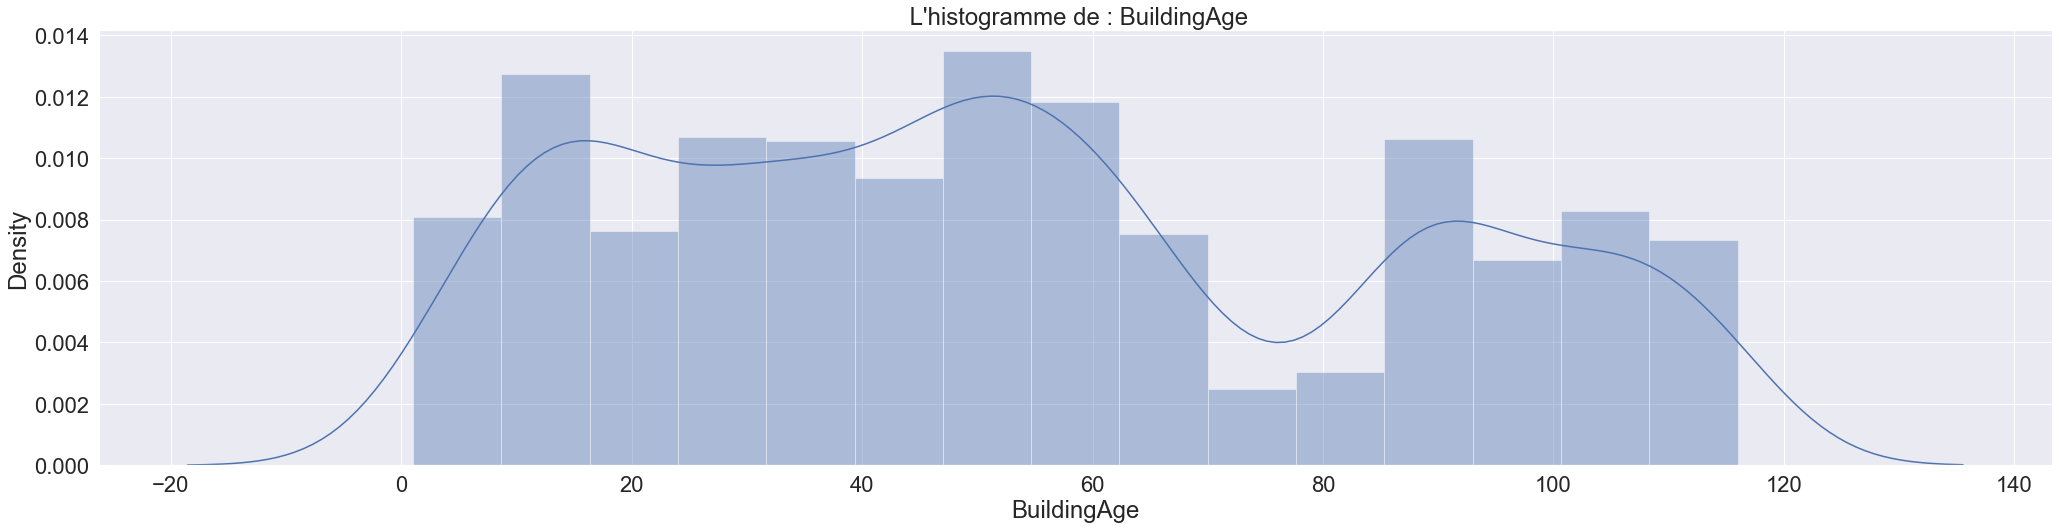

In [201]:

sns.set(font_scale=2)
for column in data_numeric.columns:
    plt.figure(figsize = (35,8))
    
    sns.distplot(data[column])
    chaine = " L'histogramme de : " + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

##### Description de la dataframe aprés nettoyage : 

In [202]:
data_numeric.describe()


,CouncilDistrictCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
count,3162.000000,3162.000000,3162.000000,3.162000e+03,3162.000000,3.162000e+03,3.162000e+03,3.162000e+03,3162.000000,3162.000000,3162.000000
mean,4.364643,1.114801,4.152435,1.162019e+05,13374.462366,1.028274e+05,9.573655e+04,8.015155e+06,178.084213,1.492903,53.854206
std,2.198369,2.261693,6.659394,2.549131e+05,44063.634812,2.375794e+05,2.294200e+05,2.097926e+07,676.400439,2.171687,32.664098
min,1.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000e+00,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,2.941700e+04,0.000000,2.849200e+04,2.550525e+04,1.356990e+06,20.292500,0.280000,27.000000
50%,4.000000,1.000000,2.000000,4.898850e+04,0.000000,4.703750e+04,4.312200e+04,2.707758e+06,49.580000,0.800000,50.000000
75%,7.000000,1.000000,4.000000,1.041725e+05,0.000000,9.447000e+04,9.034500e+04,7.132133e+06,138.807500,1.790000,86.000000
max,7.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,4.716139e+08,16870.980000,34.090000,116.000000


##### Barplot  pour les variables qualitatives : 

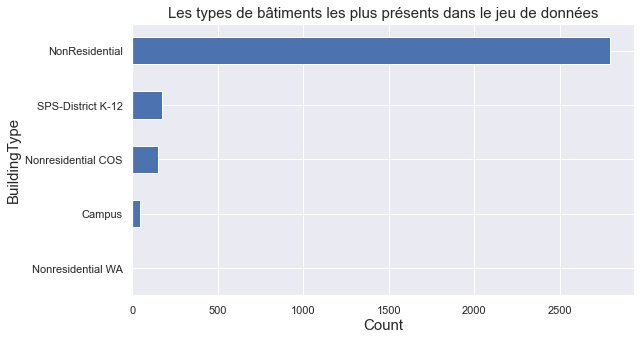

In [203]:
fig = plt.figure(figsize=(9,5))
data.groupby('BuildingType').size().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Count', fontsize=15)
plt.ylabel('BuildingType', fontsize=15)
plt.title('Les types de bâtiments les plus présents dans le jeu de données' , fontsize= 15)
plt.show()

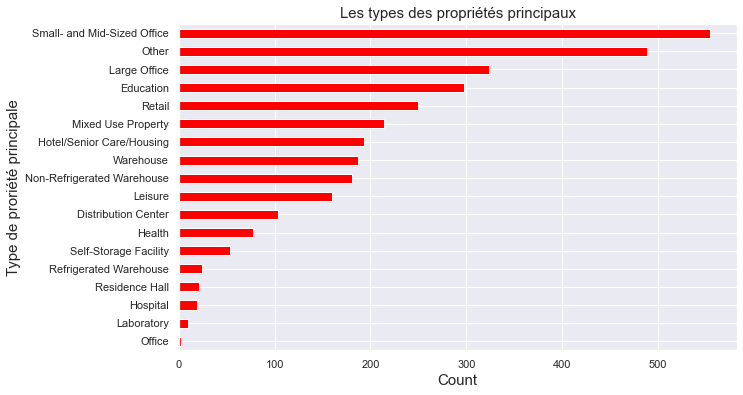

In [204]:
fig = plt.figure(figsize=(10,6))
data.groupby('PrimaryPropertyType').size().sort_values(ascending= True).plot(kind='barh' , color='red')
plt.xlabel('Count', fontsize=15)
plt.ylabel('Type de proriété principale', fontsize=15)
plt.title('Les types des propriétés principaux' , fontsize= 15)
plt.show()


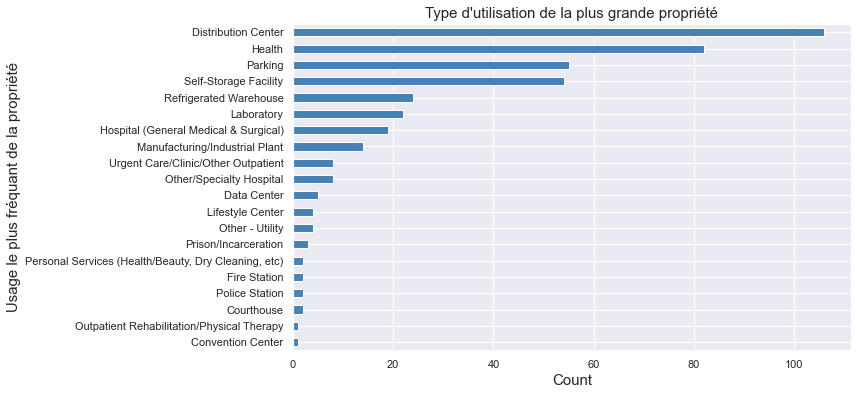

In [205]:
fig = plt.figure(figsize=(10,6))
data.groupby('LargestPropertyUseType').size().sort_values(ascending= True).head(20).plot(kind='barh' , color='steelblue')
plt.xlabel('Count', fontsize=15)
plt.ylabel('Usage le plus fréquant de la propriété', fontsize=15)
plt.title("Type d'utilisation de la plus grande propriété" , fontsize= 15)
plt.show()

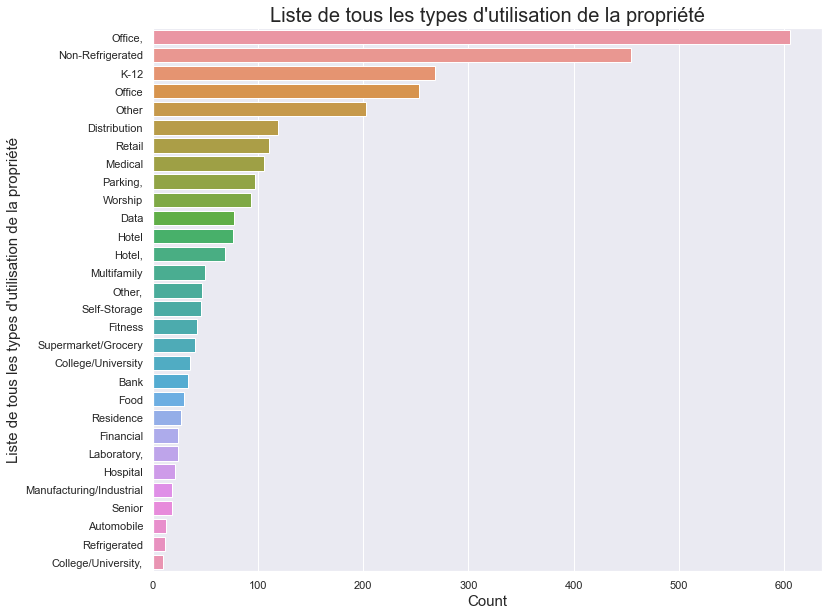

In [206]:
plt.figure(figsize=(12,10))
wrds1 = data['ListOfAllPropertyUseTypes'].str.split(' ').str[0].value_counts()
data_wrds1= pd.DataFrame(wrds1).reset_index().rename(columns={'index':'ListOfAllPropertyUseTypes', 'ListOfAllPropertyUseTypes':'count'}).head(30)
sns.barplot(x='count' , y ='ListOfAllPropertyUseTypes' , data=data_wrds1)
plt.title("Liste de tous les types d'utilisation de la propriété" , fontsize= 20)
plt.ylabel("Liste de tous les types d'utilisation de la propriété", fontsize= 15 )
plt.xlabel('Count', fontsize= 15)
plt.show()


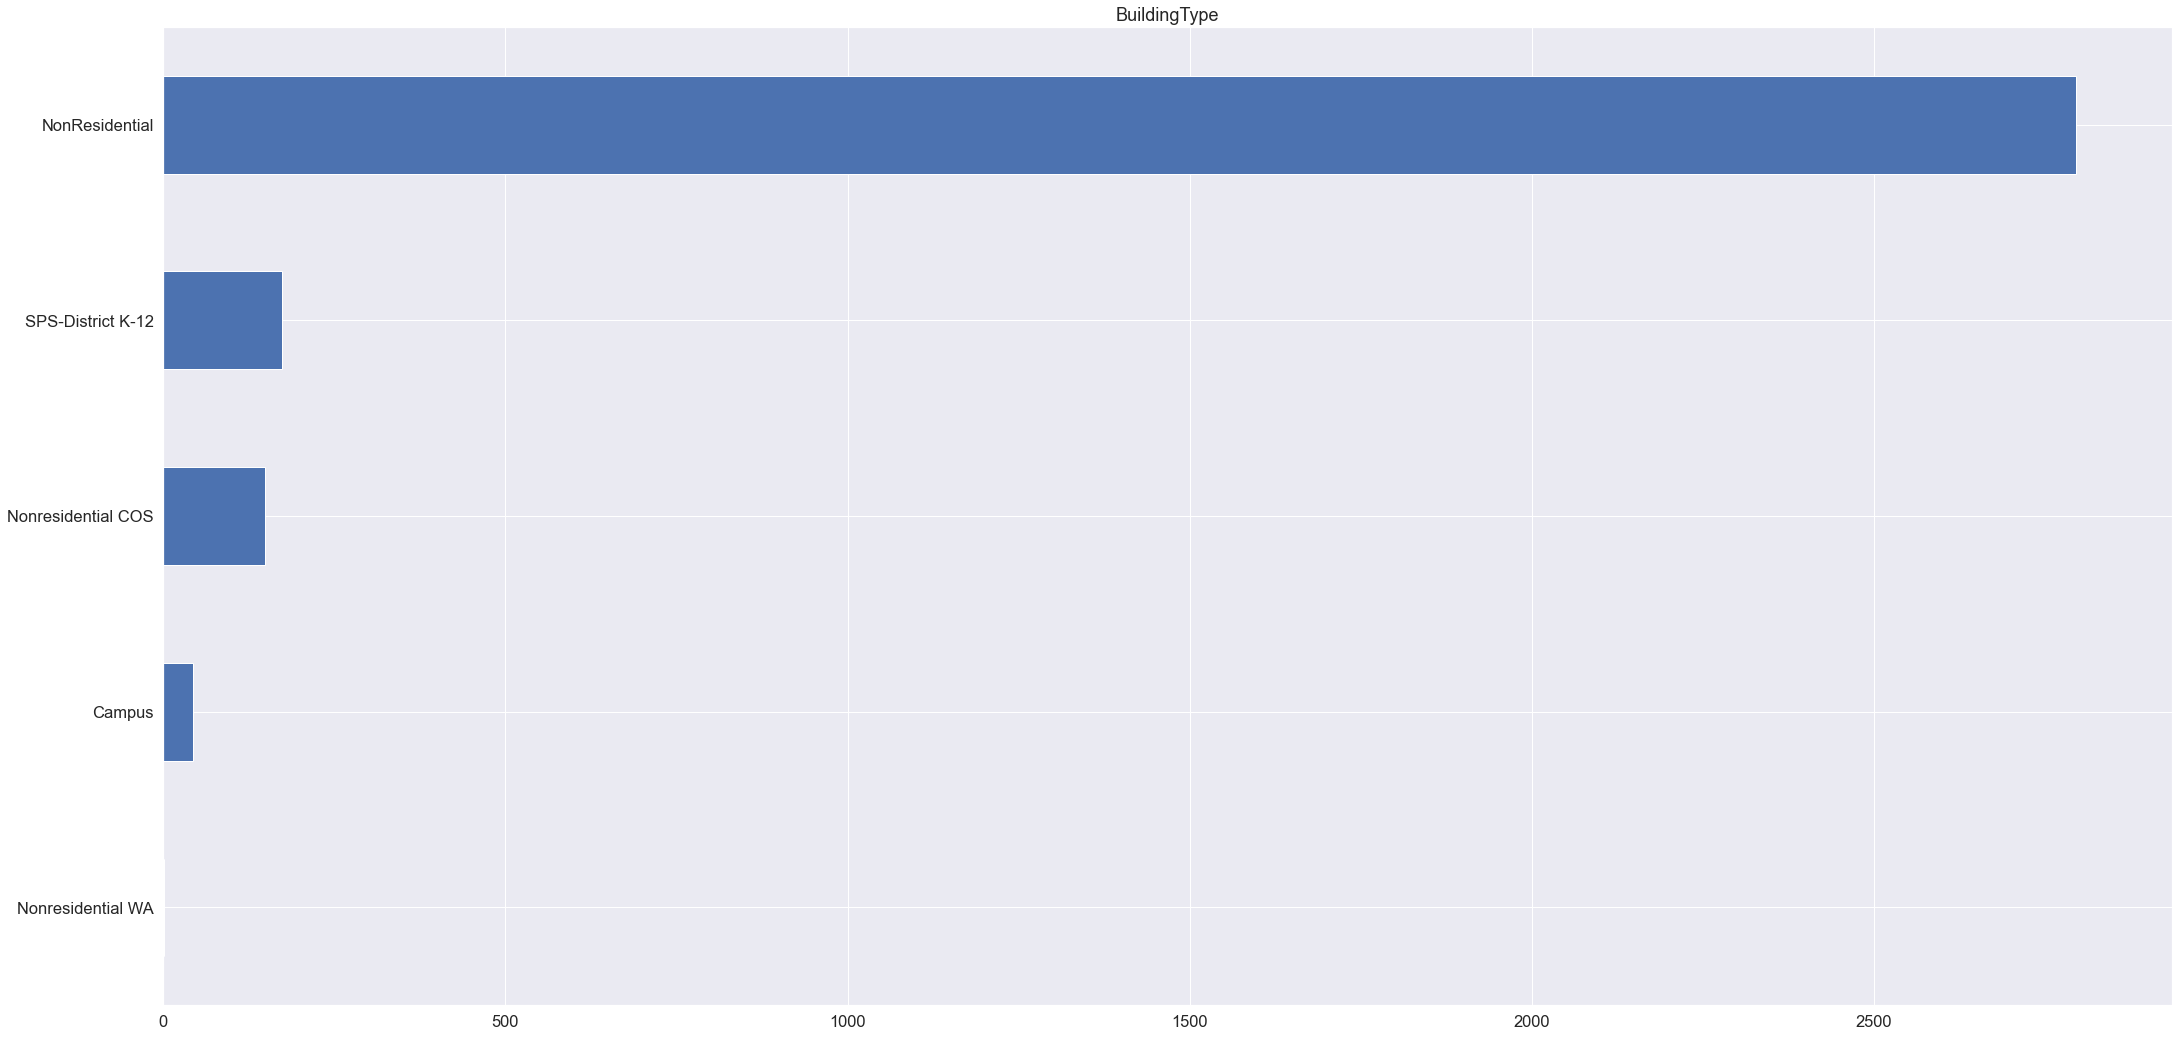

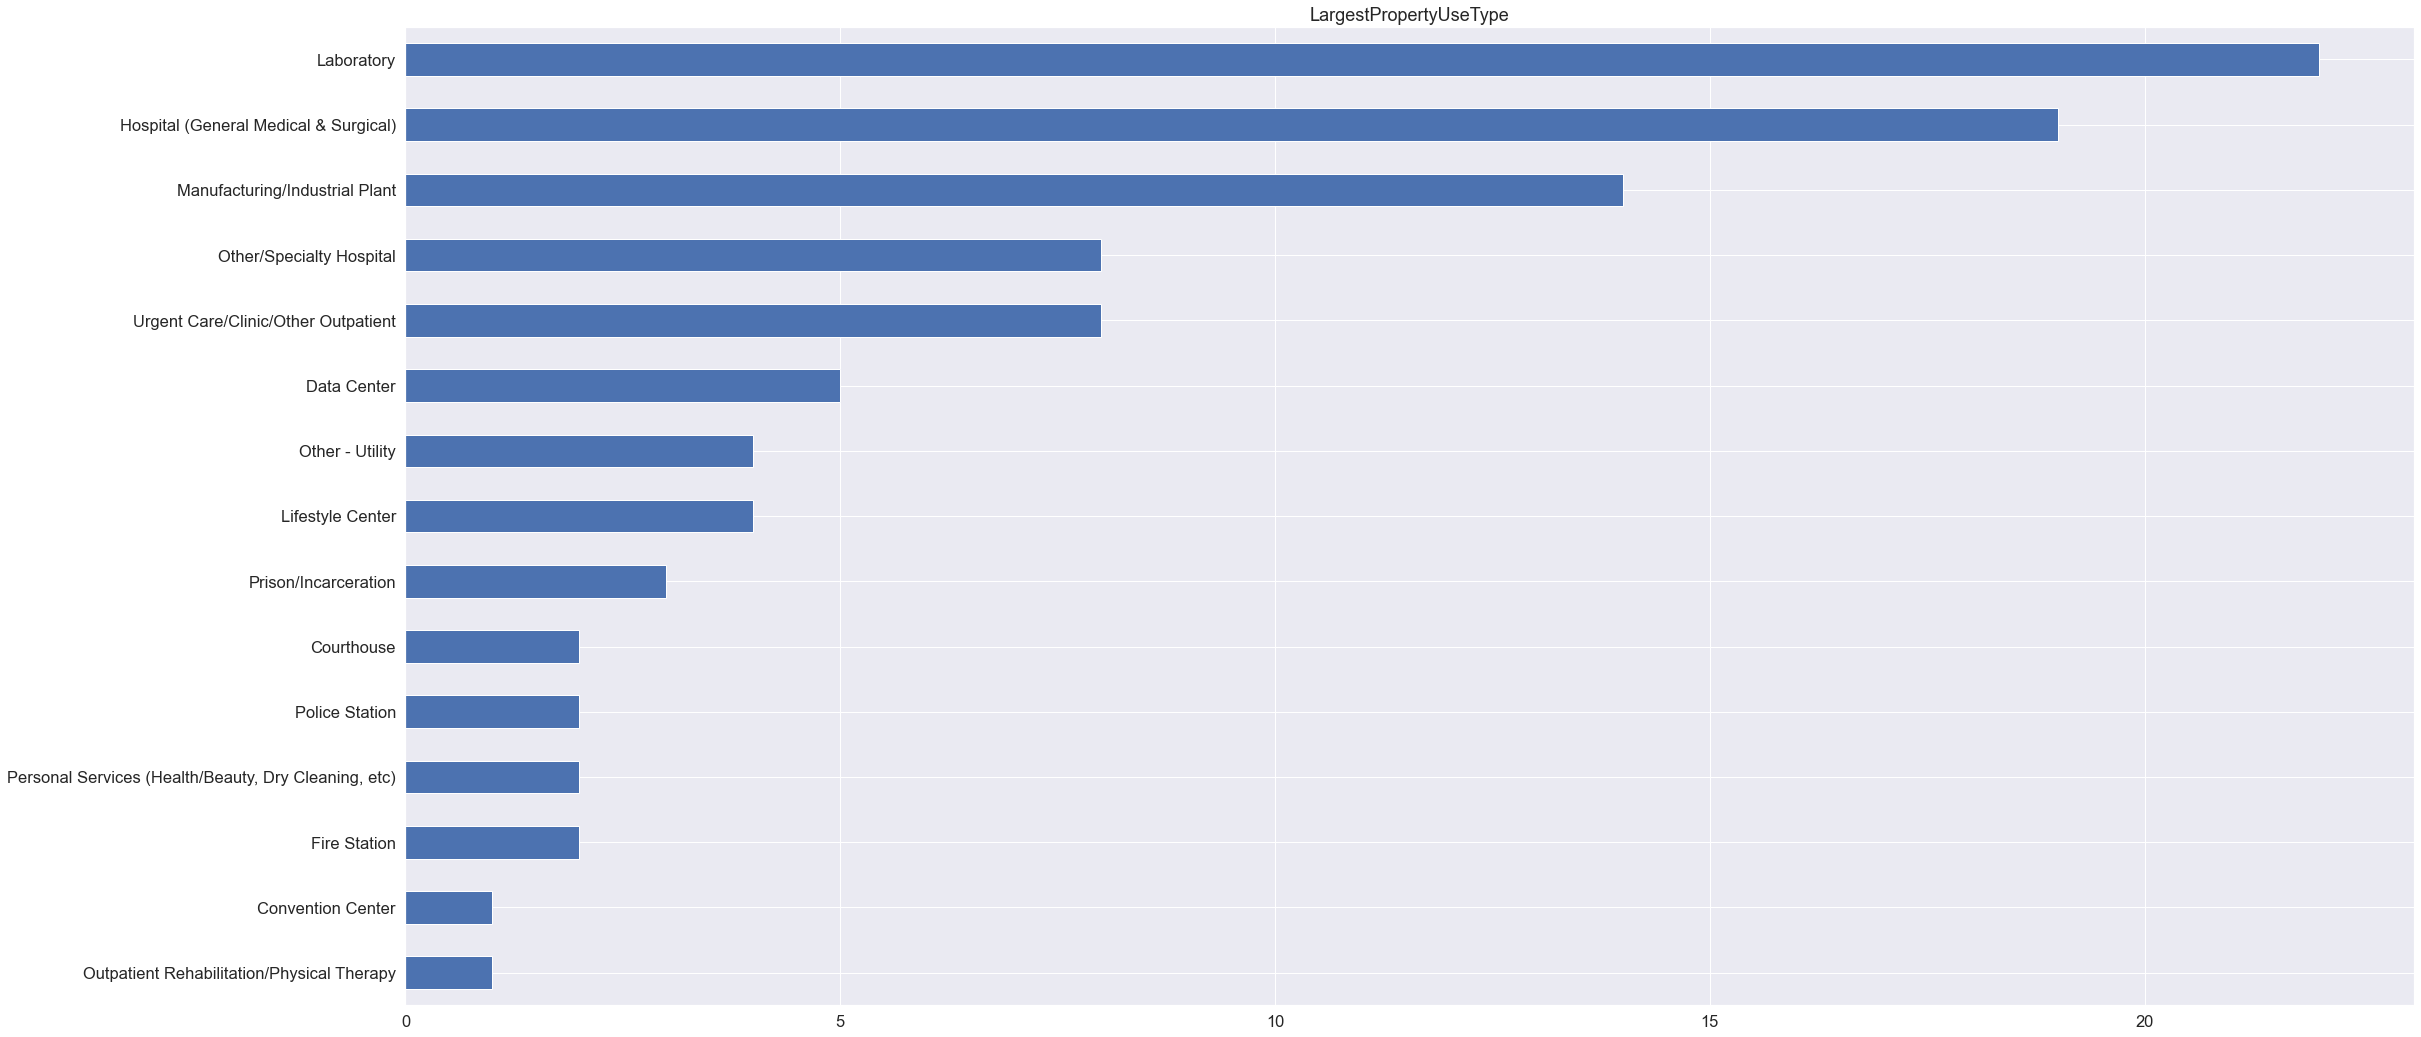

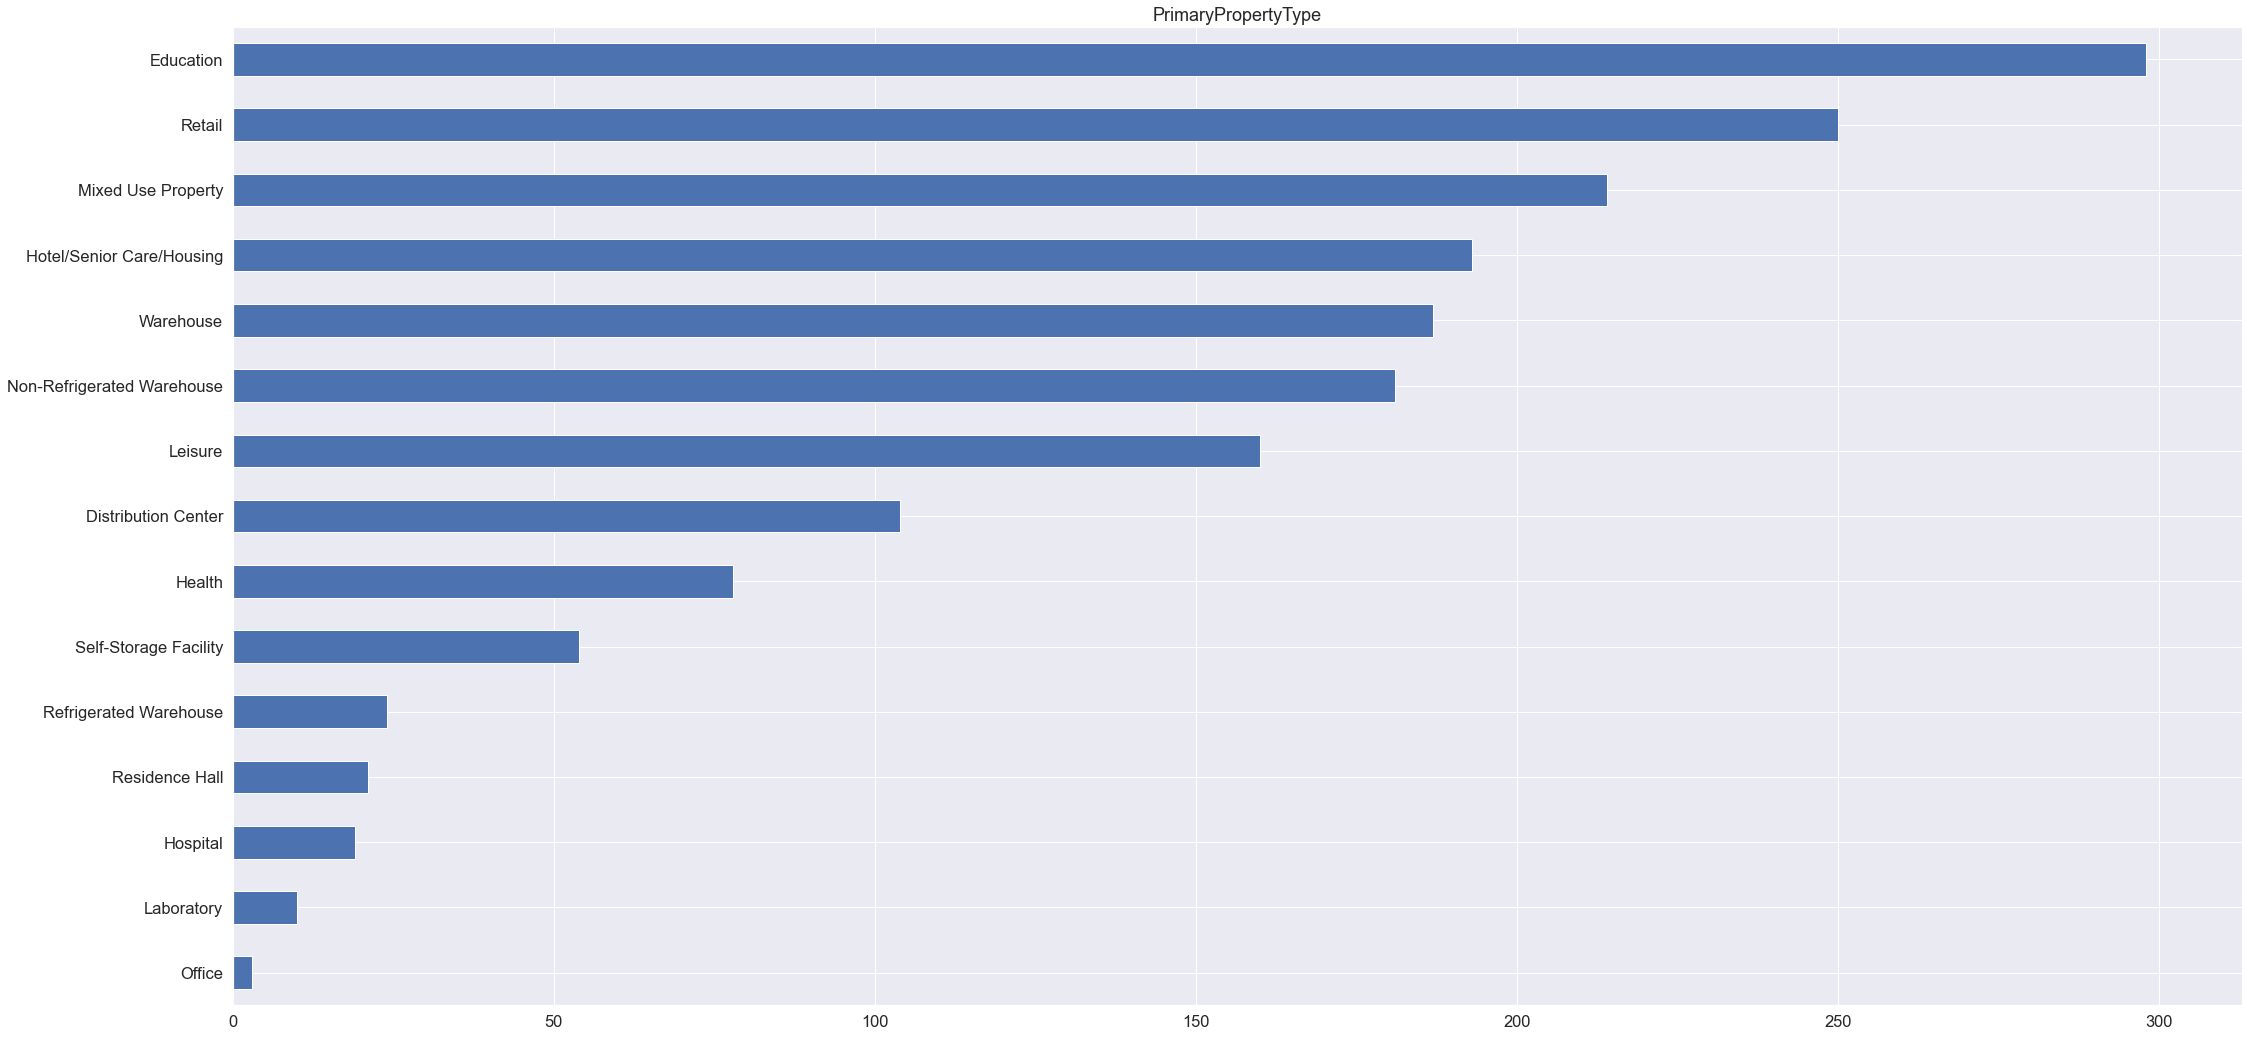

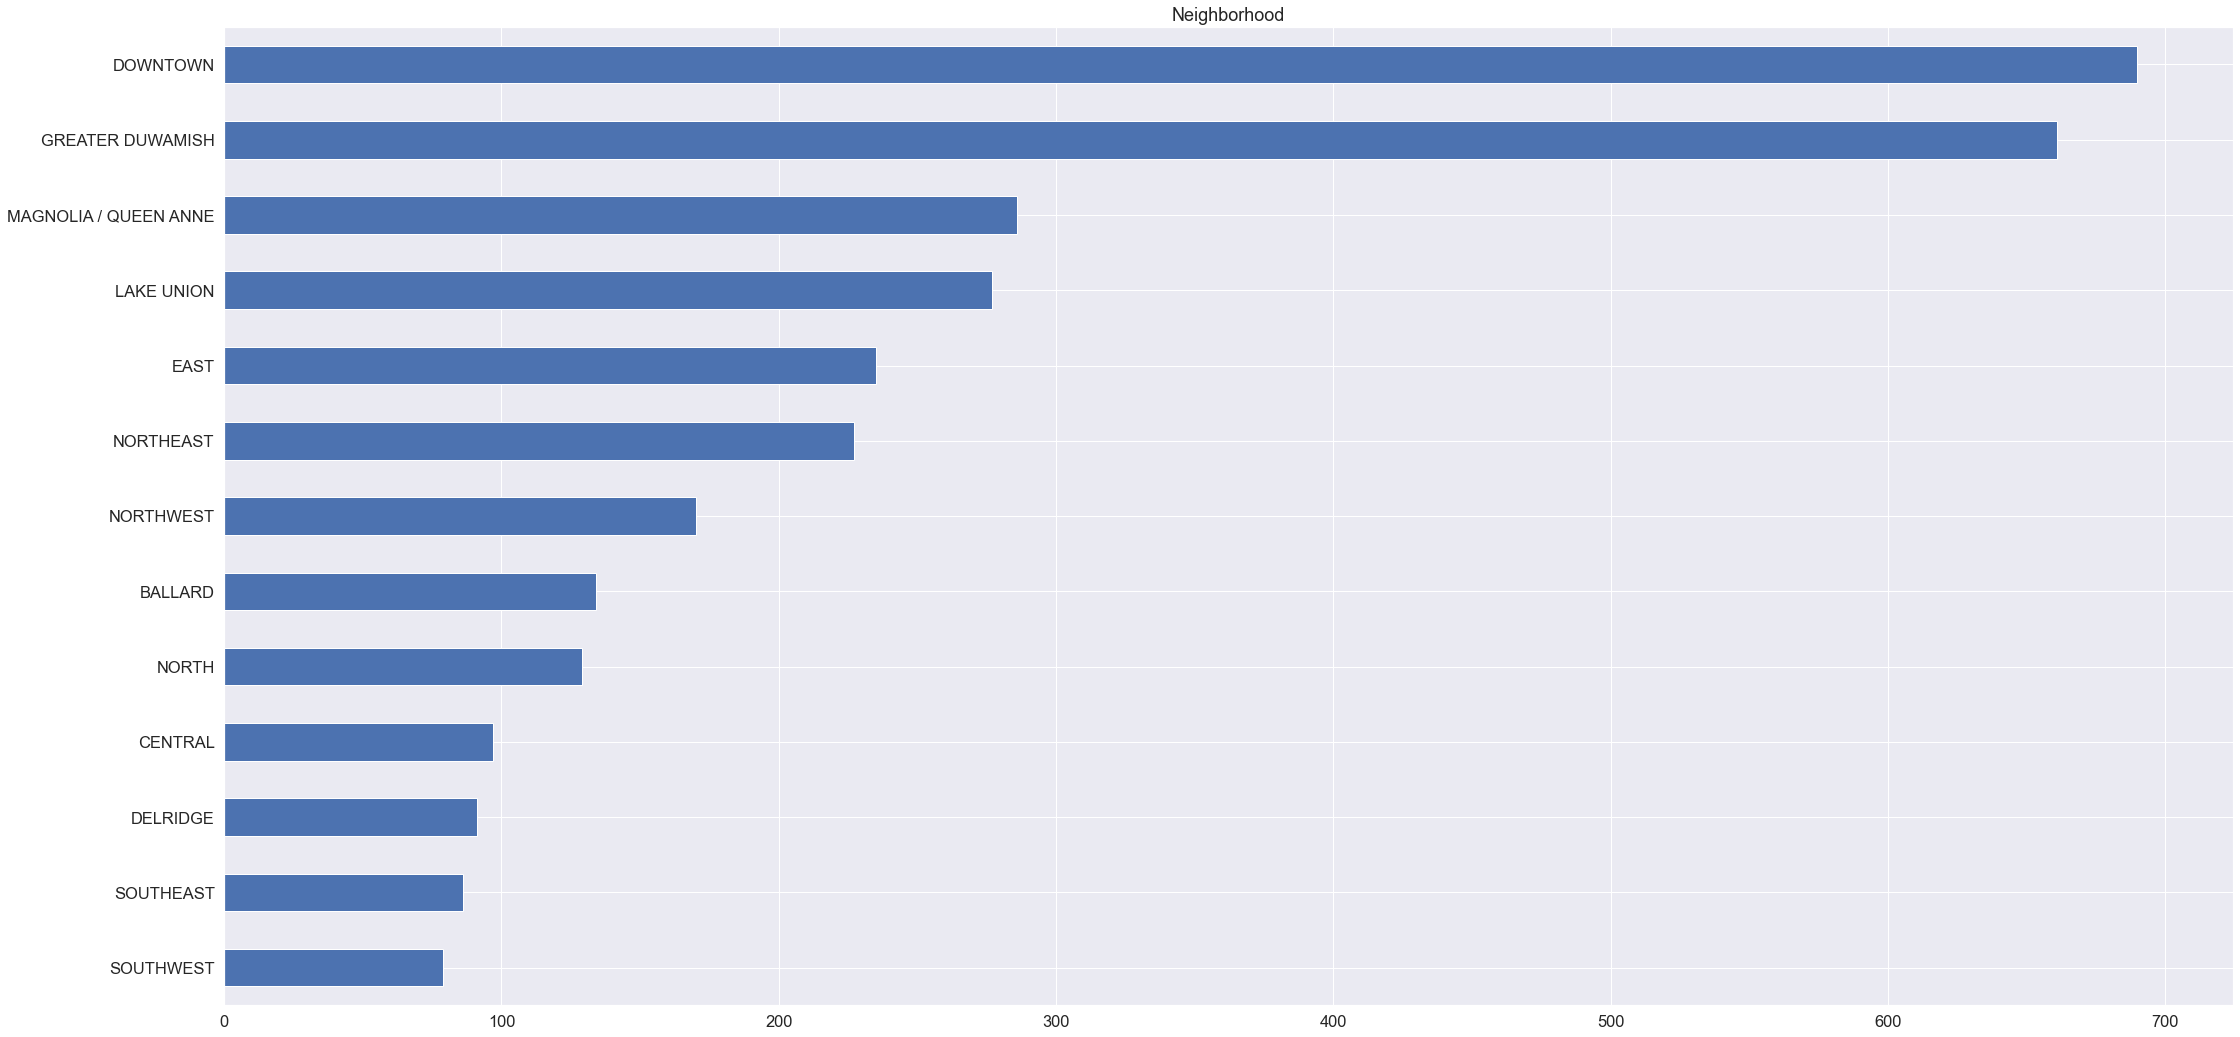

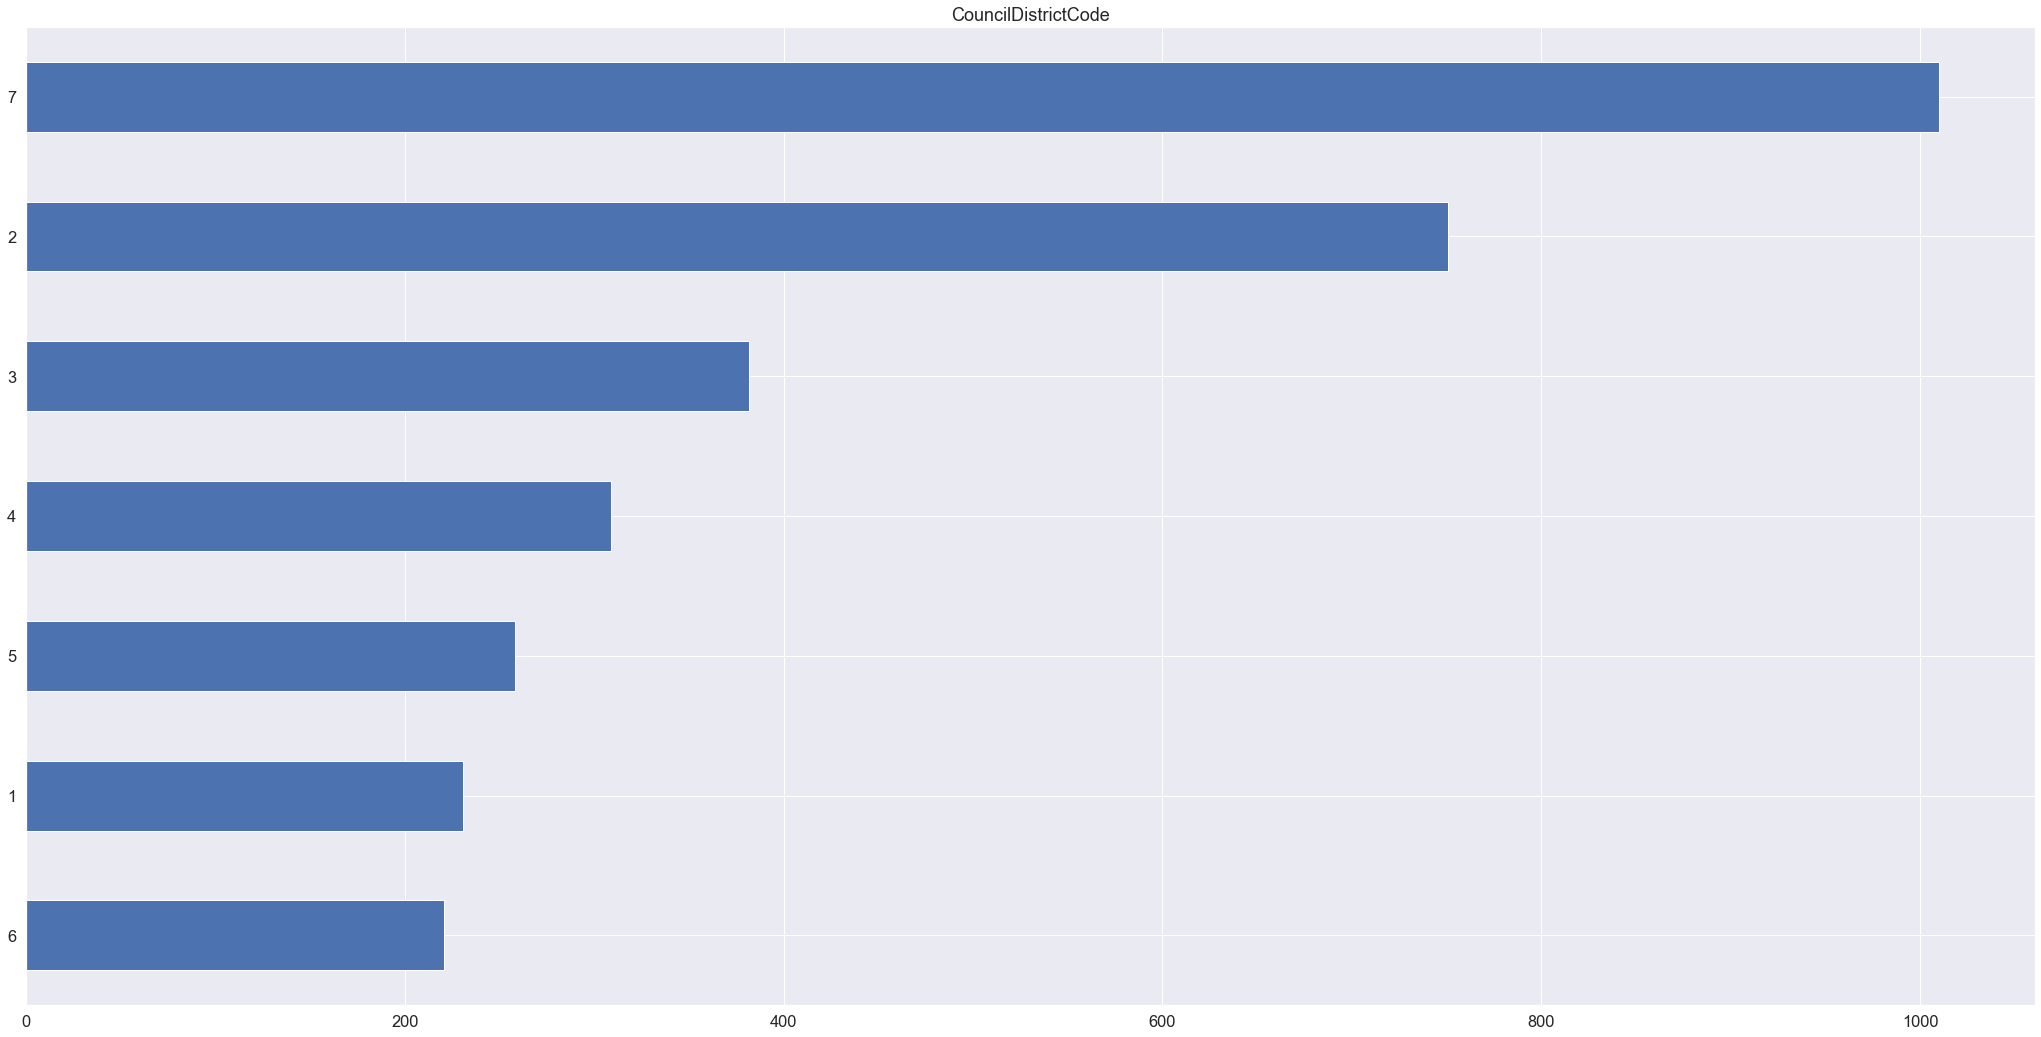

In [207]:
qualitative_columns = ['BuildingType', 'LargestPropertyUseType', 'PrimaryPropertyType', 'Neighborhood', 'CouncilDistrictCode']
for column in qualitative_columns:
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(36,18))
    data[column].value_counts().sort_values(ascending=True).head(15).plot(kind='barh')
    plt.title(column ,)
    plt.show()

###  <p style="color:green;"><b>2.2  Analyse bivariée : </p><b>

##### Matrice de corrélation : 

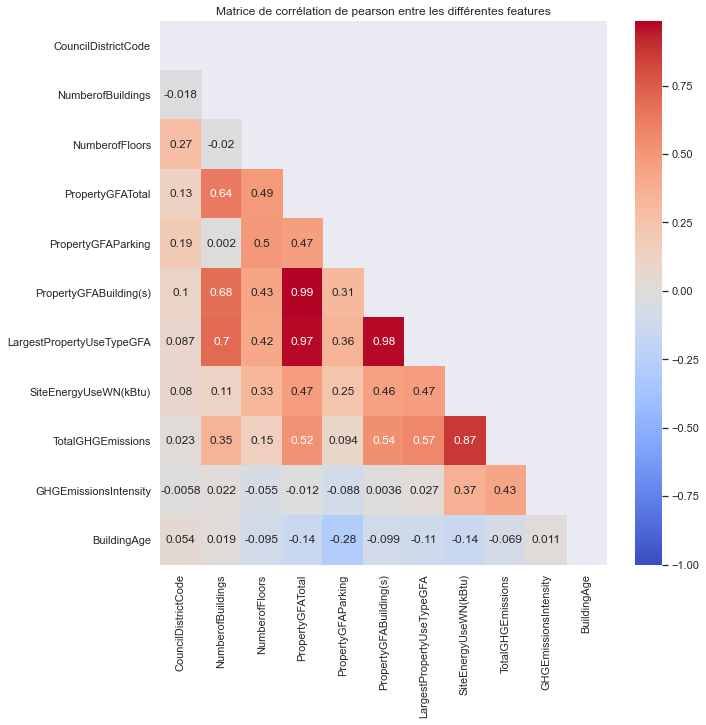

In [208]:

plt.figure(figsize=(10,10))
sns.set(font_scale=1)
plt.title('Matrice de corrélation de pearson entre les différentes features')

corr = data_numeric.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, annot=True ,vmin=-1, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)

**Observations**
* Corrélation importante entre : PropertyGFATotal et PropertyGFABuilding(s) / LargestPropertyUseTypeGFA
* Corrélation importante entre PropertyGBABuilding(s) et LargestPropertyUseTypeGFA
* **Corrélation importante entre TotalGHEmissions et PropretyGFATotal , PropretyGFABuilding(s) , LargestPropretyUseTypeGFA
* **Corrélation importante entre SiteEnergyUseWN(kBtu) et PropretyGFATotal , PropretyGFABuilding(s) , LargestPropretyUseTypeGFA.



####  Indépendance des variables : 

In [210]:
numeric_columns = data.select_dtypes(['int64', 'float64'])
numeric_columns= numeric_columns[['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)','LargestPropertyUseTypeGFA']]

def khi2(data,numeric_columns):
    alpha=0.05
    x= pd.cut(data['SiteEnergyUseWN(kBtu)'], 20)
    for col in numeric_columns.columns:
        print('-'*20)
       
        print("test de khi2 entre 'SiteEnergyUseWN(kBtu)'  et " , col)
        y= pd.cut(data[col], 20)
        tab_contingence= pd.crosstab(x.array, y.array)
        stat_chi2, p, dof, expected_table = chi2_contingency(tab_contingence.values)
        critical= chi2.ppf(1-alpha, dof)
        if p <= alpha: 
            print('Variables non indépendants (H0 Rejetée)')
        else : 
            print('H0 non rejetée')
        
khi2(data,numeric_columns)   

--------------------
test de khi2 entre 'SiteEnergyUseWN(kBtu)'  et  NumberofBuildings
Variables non indépendants (H0 Rejetée)
--------------------
test de khi2 entre 'SiteEnergyUseWN(kBtu)'  et  NumberofFloors
Variables non indépendants (H0 Rejetée)
--------------------
test de khi2 entre 'SiteEnergyUseWN(kBtu)'  et  PropertyGFATotal
Variables non indépendants (H0 Rejetée)
--------------------
test de khi2 entre 'SiteEnergyUseWN(kBtu)'  et  PropertyGFAParking
Variables non indépendants (H0 Rejetée)
--------------------
test de khi2 entre 'SiteEnergyUseWN(kBtu)'  et  PropertyGFABuilding(s)
Variables non indépendants (H0 Rejetée)
--------------------
test de khi2 entre 'SiteEnergyUseWN(kBtu)'  et  LargestPropertyUseTypeGFA
Variables non indépendants (H0 Rejetée)


In [212]:
numeric_columns = data.select_dtypes(['int64', 'float64'])
numeric_columns= numeric_columns[['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)','LargestPropertyUseTypeGFA']]

def khi2(data,numeric_columns):
    alpha=0.05
    x= pd.cut(data['TotalGHGEmissions'], 20)
    for col in numeric_columns.columns:
        print('-'*20)
       
        print("test de khi2 entre 'TotalGHGEmissions'  et " , col)
        y= pd.cut(data[col], 20)
        tab_contingence= pd.crosstab(x.array, y.array)
        stat_chi2, p, dof, expected_table = chi2_contingency(tab_contingence.values)
        critical= chi2.ppf(1-alpha, dof)
        if p <= alpha: 
            print('Variables non indépendants (H0 Rejetée)')
        else : 
            print('H0 non rejetée')
        
khi2(data,numeric_columns)   

--------------------
test de khi2 entre 'TotalGHGEmissions'  et  NumberofBuildings
Variables non indépendants (H0 Rejetée)
--------------------
test de khi2 entre 'TotalGHGEmissions'  et  NumberofFloors
Variables non indépendants (H0 Rejetée)
--------------------
test de khi2 entre 'TotalGHGEmissions'  et  PropertyGFATotal
Variables non indépendants (H0 Rejetée)
--------------------
test de khi2 entre 'TotalGHGEmissions'  et  PropertyGFAParking
Variables non indépendants (H0 Rejetée)
--------------------
test de khi2 entre 'TotalGHGEmissions'  et  PropertyGFABuilding(s)
Variables non indépendants (H0 Rejetée)
--------------------
test de khi2 entre 'TotalGHGEmissions'  et  LargestPropertyUseTypeGFA
Variables non indépendants (H0 Rejetée)


In [ ]:
data.to_csv('data_cleaned', index=False)

###  <p style="color:green;"><b>2.3  Relation entre les variables cibles et la cariable EnergyStarScore : </p><b>

In [214]:
dataEnergyScore.shape

(3162, 21)

In [215]:
dataEnergyScore.dropna(inplace=True)

In [216]:
dataEnergyScore.shape

(2115, 21)

In [217]:
dataEnergyScore.isnull().sum()

BuildingType                     0
PrimaryPropertyType              0
PropertyName                     0
TaxParcelIdentificationNumber    0
CouncilDistrictCode              0
Neighborhood                     0
NumberofBuildings                0
NumberofFloors                   0
PropertyGFATotal                 0
PropertyGFAParking               0
PropertyGFABuilding(s)           0
ListOfAllPropertyUseTypes        0
LargestPropertyUseType           0
LargestPropertyUseTypeGFA        0
ENERGYSTARScore                  0
SiteEnergyUseWN(kBtu)            0
TotalGHGEmissions                0
GHGEmissionsIntensity            0
DefaultData                      0
ComplianceStatus                 0
BuildingAge                      0
dtype: int64

##### Exportation du fichier csv contenant la variable EnergyStarScore: 

In [219]:
dataEnergyScore.to_csv('dataEnergyScore.csv', index=False)

#####  Scatterplot  :



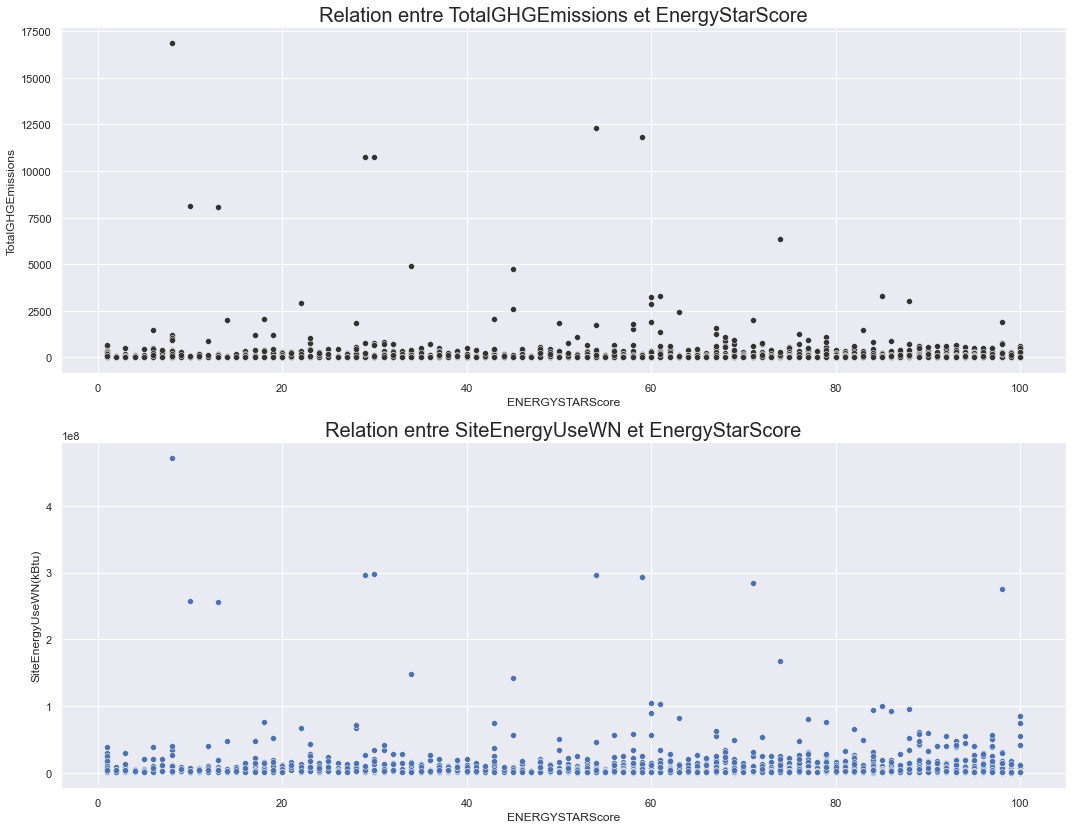

In [218]:
fig,ax=plt.subplots(2,1, figsize=(18,14))
sns.scatterplot(x= dataEnergyScore['ENERGYSTARScore'] , y= dataEnergyScore['TotalGHGEmissions'],ax=ax[0],color=".2")
ax[0].set_title('Relation entre TotalGHGEmissions et EnergyStarScore', fontsize= 20)

sns.scatterplot(x= dataEnergyScore['ENERGYSTARScore'] , y= dataEnergyScore['SiteEnergyUseWN(kBtu)'],ax=ax[1])
ax[1].set_title('Relation entre SiteEnergyUseWN et EnergyStarScore', fontsize= 20)
plt.show()

###### Aprés transfromation des variables cibles :  Passage au log 

In [222]:
dataEnergyScore['log2_SiteEnergyUseWN(kBtu)']=np.log2(1+dataEnergyScore['SiteEnergyUseWN(kBtu)'])
dataEnergyScore['log2_TotalGHGEmissions']=np.log2(1+dataEnergyScore['TotalGHGEmissions'])

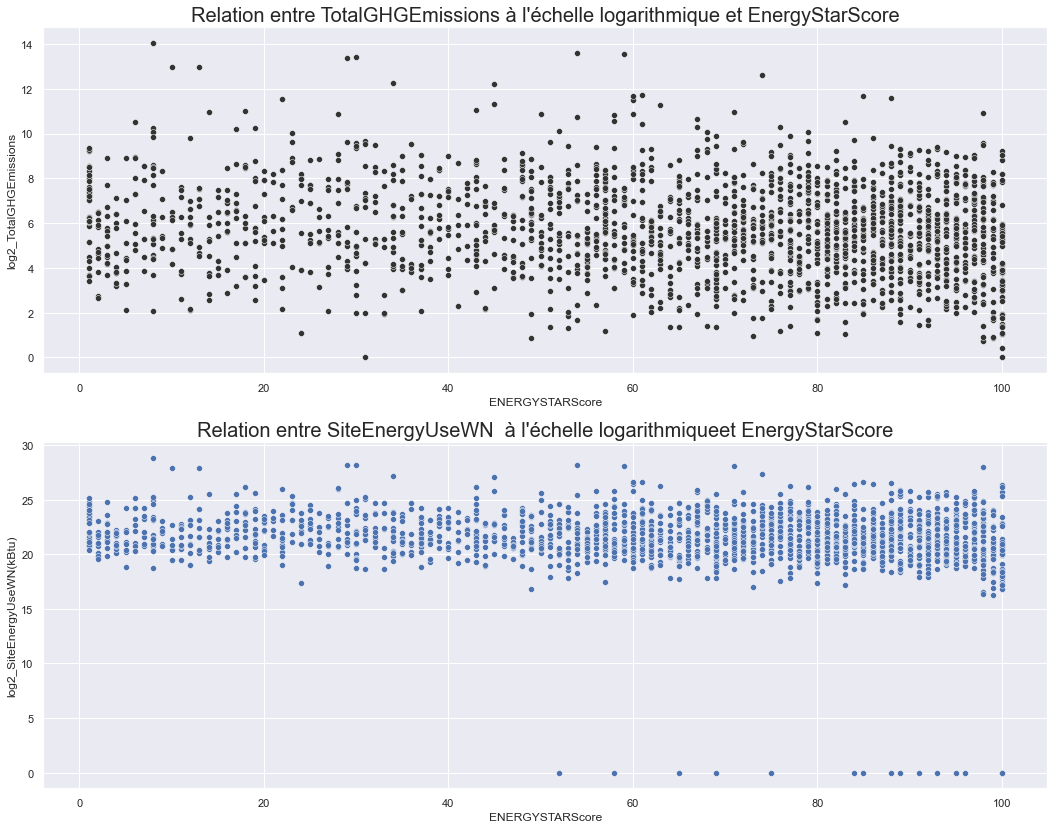

In [223]:
fig,ax=plt.subplots(2,1, figsize=(18,14))
sns.scatterplot(x= dataEnergyScore['ENERGYSTARScore'] , y= dataEnergyScore['log2_TotalGHGEmissions'],ax=ax[0],color=".2")
ax[0].set_title("Relation entre TotalGHGEmissions à l'échelle logarithmique et EnergyStarScore", fontsize= 20)

sns.scatterplot(x= dataEnergyScore['ENERGYSTARScore'] , y= dataEnergyScore['log2_SiteEnergyUseWN(kBtu)'],ax=ax[1])
ax[1].set_title("Relation entre SiteEnergyUseWN  à l'échelle logarithmiqueet EnergyStarScore", fontsize= 20)
plt.show()

#### Relation avec les autres variables : 

In [224]:
dataNumeric2= dataEnergyScore.select_dtypes(['int64','float64'])

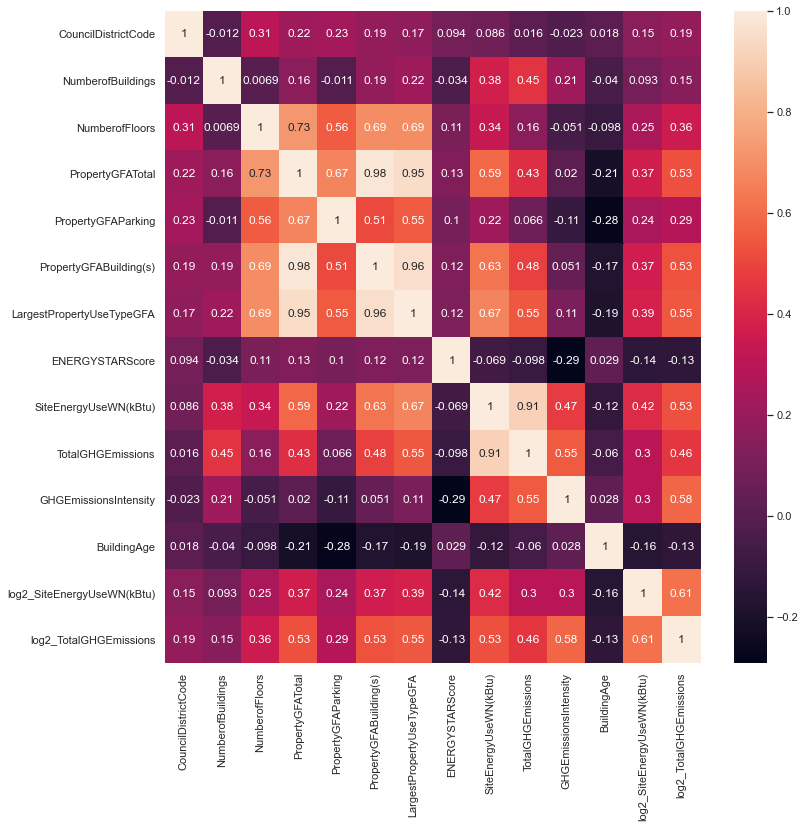

In [226]:
fig= plt.figure(figsize=(12,12))
sns.heatmap(dataNumeric2.corr() , annot=True)
plt.show()

#### 